# Prediction Model for LendingClub
<b>G1-10:</b> Aarushi GOYAL | Jarrett TAN | Jason LIM | Ryan TAN | Scarlett YEH

## Table of Contents
1.  [Introduction to Lending Club](#intro)
+ [Import Data](#import)
+ [Data Pre-processing (Part I)](#pre1)
    + Response Variable 
    + Features Selection
+ [Exploratory Data Analysis (EDA)](#eda)
    + 16 Features
+ [Data Pre-processing (Part II)](#pre2)
    + Convert Categorical Variables to Binary Variables
+ [Clustering](#clus)
+ [Correlation Analysis](#cor)
+ [Data Partition](#part)
+ [Modelling](#mod)
    + Logistic Regression
    + K-Nearest Neighbour (K-NN)
    + Random Forest
    + Model Comparison
+ [Evaluation of Chosen Model](#eva)
    + Test Set Evaluation
    + ROC Curve
    + Confusion Matrix
+ [Model Deployment](#dep)
+ [Conclusion](#con)

## 1. Introduction to LendingClub <a id = "intro"></a>

LendingClub is an America-based peer-to-peer lending company that is listed in the New York Stock Exchange. 

The firm provides unsecured loans from USD\\$1,000 to USD\\$40,000. LendingClub has at present more than 2million active loans totalling USD\\$7Bn in value. However, 10\% of loans issued default yearly.

Our solution aims to develop a predictive model that can help LendingClub more accurately predict an individual's 
propensity to default and charge an appropriate interest rate for risk undertaken or outright reject high risk individuals.

### 1.1 Dataset

Dataset used in this project is hosted on Kaggle. 
<br>LendingClub data 🡆 [Click Here](https://www.kaggle.com/wendykan/lending-club-loan-data#loan.csv)

## 2. Import Data<a id = "import"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Set pandas options
pd.set_option("display.max.rows", None, 
              "display.max.columns", None, 
              "display.precision", 2)

Read data into pandas dataframe:

In [2]:
df = pd.read_csv('loan.csv', sep=',', error_bad_lines=False, index_col=False,)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Exploring the information available in LendingClub dataset: 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


In [4]:
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0 NaN        NaN       2500         2500           2500.0   36 months   
1 NaN        NaN      30000        30000          30000.0   60 months   
2 NaN        NaN       5000         5000           5000.0   36 months   
3 NaN        NaN       4000         4000           4000.0   36 months   
4 NaN        NaN      30000        30000          30000.0   60 months   

   int_rate  installment grade sub_grade       emp_title emp_length  \
0     13.56        84.92     C        C1            Chef  10+ years   
1     18.94       777.23     D        D2     Postmaster   10+ years   
2     17.97       180.69     D        D1  Administrative    6 years   
3     18.94       146.51     D        D2   IT Supervisor  10+ years   
4     16.14       731.78     C        C4        Mechanic  10+ years   

  home_ownership  annual_inc verification_status   issue_d loan_status  \
0           RENT     55000.0        Not Verified  Dec-2018     Current   
1       MORTGAGE     90000.0     Source Verified  Dec-2018     Current   
2       MORTGAGE     59280.0     Source Verified  Dec-2018     Current   
3       MORTGAGE     92000.0     Source Verified  Dec-2018     Current   
4       MORTGAGE     57250.0        Not Verified  Dec-2018     Current   

  pymnt_plan  url desc             purpose               title zip_code  \
0          n  NaN  NaN  debt_consolidation  Debt consolidation    109xx   
1          n  NaN  NaN  debt_consolidation  Debt consolidation    713xx   
2          n  NaN  NaN  debt_consolidation  Debt consolidation    490xx   
3          n  NaN  NaN  debt_consolidation  Debt consolidation    985xx   
4          n  NaN  NaN  debt_consolidation  Debt consolidation    212xx   

  addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0         NY  18.24          0.0         Apr-2001             1.0   
1         LA  26.52          0.0         Jun-1987             0.0   
2         MI  10.51          0.0         Apr-2011             0.0   
3         WA  16.74          0.0         Feb-2006             0.0   
4         MD  26.35          0.0         Dec-2000             0.0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     NaN                    45.0       9.0      1.0   
1                    71.0                    75.0      13.0      1.0   
2                     NaN                     NaN       8.0      0.0   
3                     NaN                     NaN      10.0      0.0   
4                     NaN                     NaN      12.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0       4341        10.3       34.0                   w    2386.02   
1      12315        24.2       44.0                   w   29387.75   
2       4599        19.1       13.0                   w    4787.21   
3       5468        78.1       13.0                   w    3831.93   
4        829         3.6       26.0                   w   29339.02   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        2386.02       167.02           167.02           113.98   
1       29387.75      1507.11          1507.11           612.25   
2        4787.21       353.89           353.89           212.79   
3        3831.93       286.71           286.71           168.07   
4       29339.02      1423.21          1423.21           660.98   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0          53.04                 0.0         0.0                      0.0   
1         894.86                 0.0         0.0                      0.0   
2         141.10                 0.0         0.0                      0.0   
3         118.64                 0.0         0.0                      0.0   
4         762.23                 0.0         0.0                      0.0   

  last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  \
0     Feb-2019            84.92     Mar

## 3. Data Pre-processing (Part I)<a id = "pre1"></a>

### 3.1 Response Variable

To predict the probability of the loan being charged off, loan_status has been identified to be the response variable in LendingClub dataset.

A value check will first be performed to identify the required loan status for the prediction model: 

In [5]:
df.loan_status.value_counts()

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

"Fully Paid" and "Charged Off" are identified to be the only two loan status that will be considered. Other loan status will be dropped. 

In [6]:
df1 = df.copy()
df1 = df1.loc[df1.loan_status.isin(['Fully Paid', 'Charged Off'])]

A check will be performed to identify the dimension and value count for the remaining loans:

In [7]:
df1.shape

(1303607, 145)

In [8]:
df1.loan_status.value_counts()

Fully Paid     1041952
Charged Off     261655
Name: loan_status, dtype: int64

A check will be performed to identify for the presence an imbalanced data set:

In [9]:
df1.loan_status.value_counts(normalize=True)

Fully Paid     0.8
Charged Off    0.2
Name: loan_status, dtype: float64

Classification problem is identified to be present. Majority of the loans have been fully paid, leaving 20.0% of loans to be charged off. 

### 3.2 Features Selection

<ins>145 features</ins> are found to be present in LendingClub dataset. To narrow down and select the features useful to predict loan status, the following steps will be performed:
1. Drop features based on percentage of missing data
2. Inspect each feature individually and manually select relevant features</li>

#### 3.2.1 Dropping Features based on Percentage of Missing Data

In [10]:
missing_val_pct = df1.isnull().mean().sort_values()*100

A histogram will be plotted to indentify the range of missing data present in the features of LendingClub dataset: 

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

Text(0, 0.5, 'Feature Count')

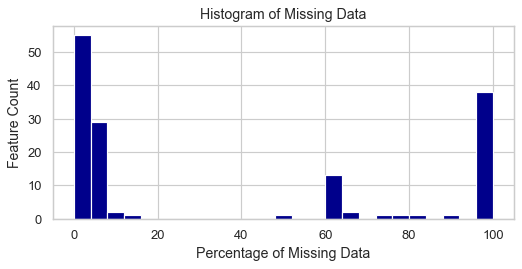

In [12]:
plt.figure(figsize=(7,3), dpi=85)
missing_val_pct.plot.hist(bins=25, color='#00008b')
plt.title('Histogram of Missing Data')
plt.xlabel('Percentage of Missing Data')
plt.ylabel('Feature Count')

Based on the histogram of missing data, data with more than 20% will be removed to allow for accurate data imputation. The following features will be dropped:

In [13]:
drop_list = sorted(list(missing_val_pct[missing_val_pct > 20].index))
print(drop_list)

['all_util', 'annual_inc_joint', 'debt_settlement_flag_date', 'deferral_term', 'desc', 'dti_joint', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'id', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'member_id', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 'orig_projected_additional_accrued_interest', 'payment_plan_start_date', 'revol_bal_joint', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_mths_since_last_major_derog', 'sec_app_num_rev_accts', 'sec_app_o

In [14]:
len(drop_list)

58

In [15]:
df2 = df1.copy()
df2.drop(labels=drop_list, axis=1, inplace=True)

Exploring dimensions and remaining features after dropping 58 features based on missing values:

In [16]:
df2.shape

(1303607, 87)

#### 3.2.2 Manual Selection of Relevant Features

Based on LendingClub's data dictionary, the following 16 features have been identified to be essential for the prediction modelling:

In [17]:
df3 = df2[['annual_inc','avg_cur_bal','emp_length','delinq_2yrs',
           'dti','grade','home_ownership','inq_last_6mths',
           'installment','int_rate','loan_amnt','loan_status',
           'num_tl_90g_dpd_24m','pub_rec','purpose','term']]

Exploring dimensions and remaining 16 features:

In [18]:
df3.shape

(1303607, 16)

In [19]:
df3.dtypes

annual_inc            float64
avg_cur_bal           float64
emp_length             object
delinq_2yrs           float64
dti                   float64
grade                  object
home_ownership         object
inq_last_6mths        float64
installment           float64
int_rate              float64
loan_amnt               int64
loan_status            object
num_tl_90g_dpd_24m    float64
pub_rec               float64
purpose                object
term                   object
dtype: object

In [20]:
df3.head()

annual_inc  avg_cur_bal emp_length  delinq_2yrs    dti grade  \
100    100000.0      42939.0    5 years          0.0  30.46     D   
152     45000.0      15059.0   < 1 year          0.0  50.53     C   
170    100000.0      57309.0  10+ years          0.0  18.92     A   
186     38500.0       2428.0  10+ years          0.0   4.64     B   
215    450000.0      34516.0    3 years          0.0  12.37     E   

    home_ownership  inq_last_6mths  installment  int_rate  loan_amnt  \
100       MORTGAGE             0.0      1151.16     22.35      30000   
152       MORTGAGE             0.0       975.71     16.14      40000   
170       MORTGAGE             0.0       622.68      7.56      20000   
186           RENT             0.0       147.99     11.31       4500   
215       MORTGAGE             0.0       345.18     27.27       8425   

    loan_status  num_tl_90g_dpd_24m  pub_rec             purpose        term  
100  Fully Paid                 0.0      1.0  debt_consolidation   36 months  
152  Fully Paid                 0.0      0.0         credit_card   60 months  
170  Fully Paid                 0.0      0.0         credit_card   36 months  
186  Fully Paid                 0.0      0.0         credit_card   36 months  
215  Fully Paid                 0.0      0.0         credit_card   36 months

## 4. Exploratory Data Analysis<a id = "eda"></a>

We will be performing Exploratory Data Analysis (EDA) on all the 15 predictor variables in alphabetical order and performing clustering on a selected few significant features:

### 4.1 annual_inc

Definition as per LendingClub's data dictionary: "The self-reported annual income provided by the borrower during registration."

Summary statistics:

In [21]:
df3.annual_inc.describe()

count    1.30e+06
mean     7.62e+04
std      7.00e+04
min      0.00e+00
25%      4.58e+04
50%      6.50e+04
75%      9.00e+04
max      1.10e+07
Name: annual_inc, dtype: float64

Due to the wide spectrum of the annual income which ranges from USD\\$0 to USD\\$10,999,200, we will be using log to convert annual_inc to <b>log_annual_inc</b>:

In [22]:
df4 = df3.copy()
df4['log_annual_inc'] = df4.annual_inc.apply(lambda x: np.log10(x+1))
df4.drop ('annual_inc', axis = 1, inplace=True)
df4.log_annual_inc.describe()

count    1.30e+06
mean     4.81e+00
std      2.45e-01
min      0.00e+00
25%      4.66e+00
50%      4.81e+00
75%      4.95e+00
max      7.04e+00
Name: log_annual_inc, dtype: float64

Data visualization:

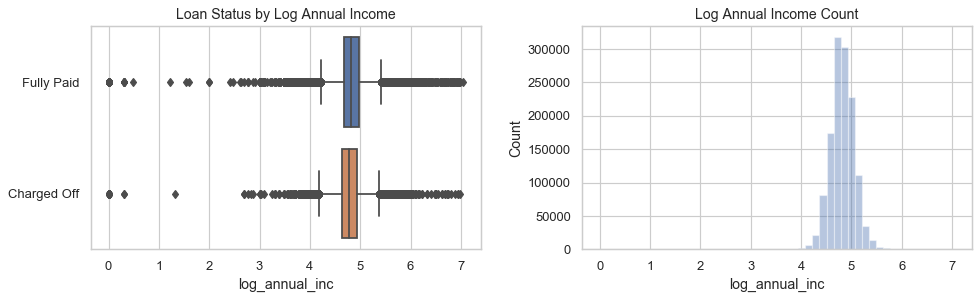

In [23]:
fig1, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4), dpi=85)

## Create boxplot for Log Annual Income by Loan Status
fig1_1 = sns.boxplot(x='log_annual_inc', y='loan_status', data=df4, ax=axes[0])
fig1_1.set_ylabel('')
fig1_1.set_title('Loan Status by Log Annual Income')

## Create histogram for log_annual_inc Count
fig1_2 = sns.distplot(df4.loc[df4['log_annual_inc'].notnull(), 'log_annual_inc'], kde=False, ax=axes[1])
fig1_2.set_ylabel('Count')
fig1_2.set_title('Log Annual Income Count')

fig1.tight_layout(pad=2.0)

### 4.2 avg_cur_bal

Definition as per LendingClub's data dictionary: "Average current balance of all accounts."

Summary statistics:

In [24]:
df4.avg_cur_bal.describe()

count    1.24e+06
mean     1.35e+04
std      1.63e+04
min      0.00e+00
25%      3.10e+03
50%      7.42e+03
75%      1.87e+04
max      9.58e+05
Name: avg_cur_bal, dtype: float64

Due to the wide spectrum of the average current balance which ranges from USD\\$0 to USD\\$958,084, we will be using log to convert avg_cur_bal to <b>log_avg_cur_bal</b>:

In [25]:
df5 = df4.copy()
df5['log_avg_cur_bal'] = df5.avg_cur_bal.apply(lambda x: np.log10(x+1))
df5.drop ('avg_cur_bal', axis = 1, inplace=True)
df5.log_avg_cur_bal.describe()

count    1.24e+06
mean     3.86e+00
std      5.15e-01
min      0.00e+00
25%      3.49e+00
50%      3.87e+00
75%      4.27e+00
max      5.98e+00
Name: log_avg_cur_bal, dtype: float64

Data visualization:

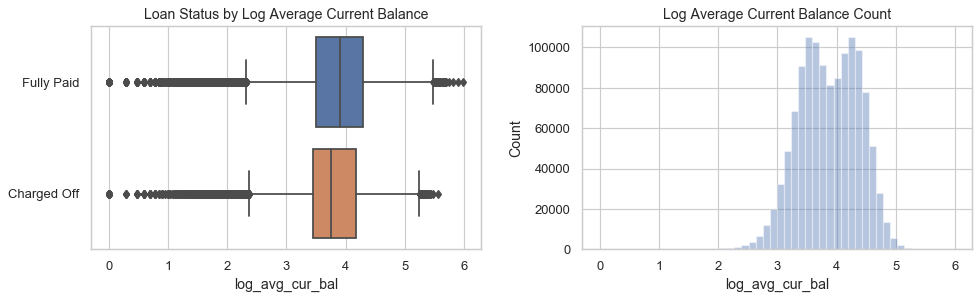

In [26]:
fig2, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4), dpi=85)

## Create boxplot for Loan Status by Log Average Current Balance
fig2_1 = sns.boxplot(x='log_avg_cur_bal', y='loan_status', data=df5, ax=axes[0])
fig2_1.set_ylabel('')
fig2_1.set_title('Loan Status by Log Average Current Balance')

## Create histogram for log_annual_inc Count
fig2_2 = sns.distplot(df5.loc[df5['log_avg_cur_bal'].notnull(), 'log_avg_cur_bal'], kde=False, ax=axes[1])
fig2_2.set_ylabel('Count')
fig2_2.set_title('Log Average Current Balance Count')

fig2.tight_layout(pad=2.0)

### 4.3 delinq_2yrs

Definition as per LendingClub's data dictionary: "The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years."

Summary statistics:

In [27]:
df5.delinq_2yrs.describe()

count    1.30e+06
mean     3.18e-01
std      8.77e-01
min      0.00e+00
25%      0.00e+00
50%      0.00e+00
75%      0.00e+00
max      3.90e+01
Name: delinq_2yrs, dtype: float64

Removing outliers outside of the 99th percentile:

In [28]:
df5.delinq_2yrs = df5.delinq_2yrs[df5.delinq_2yrs.between(df5.delinq_2yrs.quantile(0), df5.delinq_2yrs.quantile(.99))]
df5.delinq_2yrs.describe()

count    1.29e+06
mean     2.70e-01
std      6.54e-01
min      0.00e+00
25%      0.00e+00
50%      0.00e+00
75%      0.00e+00
max      4.00e+00
Name: delinq_2yrs, dtype: float64

Data visualization:

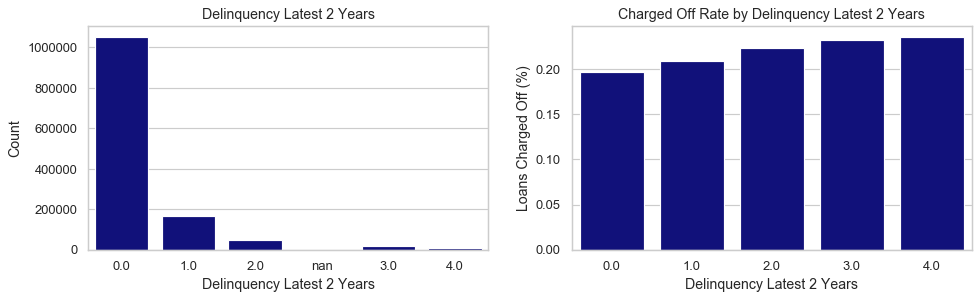

In [29]:
fig3, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4), dpi=85)

## Create histogram for Delinquency Latest 2 Years Count
fig3_1 = sns.countplot(df5['delinq_2yrs'], order=sorted(df5['delinq_2yrs'].unique()), color='#00008b', ax=axes[0])
fig3_1.set_xlabel('Delinquency Latest 2 Years')
fig3_1.set_ylabel('Count')
fig3_1.set_title('Delinquency Latest 2 Years')

## Create histogram for Charged Off Rate by Delinquency Latest 2 Years
charge_off_rates = df5.groupby('delinq_2yrs')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
fig3_2 = sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#00008b', ax=axes[1])
fig3_2.set_xlabel('Delinquency Latest 2 Years')
fig3_2.set_ylabel('Loans Charged Off (%)')
fig3_2.set_title('Charged Off Rate by Delinquency Latest 2 Years')

fig3.tight_layout(pad=2.0)

In [30]:
df5.groupby('loan_status')['delinq_2yrs'].describe()

count  mean   std  min  25%  50%  75%  max
loan_status                                               
Charged Off  2.59e+05  0.30  0.69  0.0  0.0  0.0  0.0  4.0
Fully Paid   1.03e+06  0.26  0.65  0.0  0.0  0.0  0.0  4.0

### 4.4. dti

Definition as per LendingClub's data dictionary: "A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."

Summary statistics:

In [31]:
pd.options.display.float_format = "{:.2f}".format
df5.dti.describe()

count   1303295.00
mean         18.26
std          10.94
min          -1.00
25%          11.79
50%          17.61
75%          24.04
max         999.00
Name: dti, dtype: float64

Removing outliers outside of the 99th percentile:

In [32]:
df5.dti = df5.dti[df5.dti.between(df5.dti.quantile(0), df5.dti.quantile(.99))]
df5.dti.describe()

count   1290296.00
mean         17.91
std           8.22
min          -1.00
25%          11.73
50%          17.49
75%          23.81
max          38.37
Name: dti, dtype: float64

Data visualization:

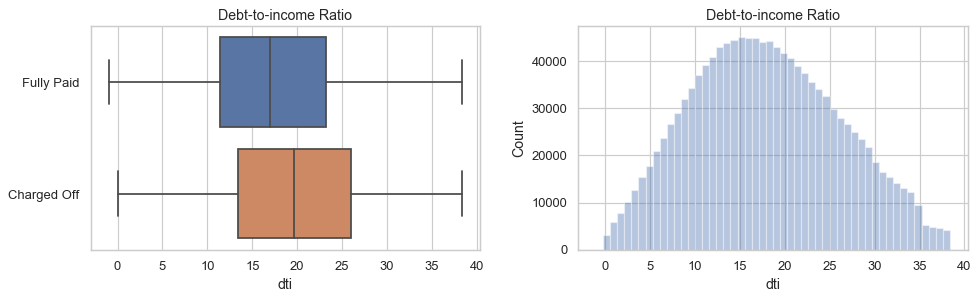

In [33]:
fig4, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4), dpi=85)

## Create boxplot for Loan Status by Log Average Current Balance
fig4_1 = sns.boxplot(x='dti', y='loan_status', data=df5, ax=axes[0])
fig4_1.set_ylabel('')
fig4_1.set_title('Debt-to-income Ratio')

## Create histogram for log_annual_inc Count
fig4_2 = sns.distplot(df5.loc[df5['dti'].notnull(), 'dti'], kde=False, ax=axes[1])
fig4_2.set_ylabel('Count')
fig4_2.set_title('Debt-to-income Ratio')

fig4.tight_layout(pad=2.0)

In [34]:
df5.groupby('loan_status')['dti'].describe()

count  mean  std   min   25%   50%   75%   max
loan_status                                                    
Charged Off  257440.00 19.68 8.37  0.00 13.46 19.59 25.97 38.37
Fully Paid  1032856.00 17.47 8.12 -1.00 11.37 17.00 23.22 38.37

### 4.5 emp_length

Definition as per LendingClub's data dictionary: "Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years."

Summary statistic:

In [35]:
df5.emp_length.value_counts(dropna=False).sort_index()

1 year        85677
10+ years    428547
2 years      117820
3 years      104200
4 years       78029
5 years       81623
6 years       60933
7 years       58145
8 years       59125
9 years       49504
< 1 year     104550
NaN           75454
Name: emp_length, dtype: int64

Data label does not match with the definition in LendingClub's data dictionary. Hence, we will be recategorizing '< 1 year', '1 year', '2 years', '3 years'and '4 years' to <b>'0-4 years'</b> and '5 years', '6 years', '7 years', '8 years' and '9 years' to <b>'5-9 years'</b>.

In [36]:
df5.emp_length = df5.emp_length.replace(to_replace = ['< 1 year','1 year','2 years','3 years','4 years'],
                                        value = '0-4 years')
df5.emp_length = df5.emp_length.replace(to_replace = ['5 years','6 years','7 years','8 years','9 years'],
                                        value = '5-9 years')
df5.emp_length = df5.emp_length.replace(to_replace = ['10+ years'],
                                        value = '>10 years')
df5.emp_length.value_counts(dropna=False).sort_index()

0-4 years    490276
5-9 years    309330
>10 years    428547
NaN           75454
Name: emp_length, dtype: int64

Data visualization:

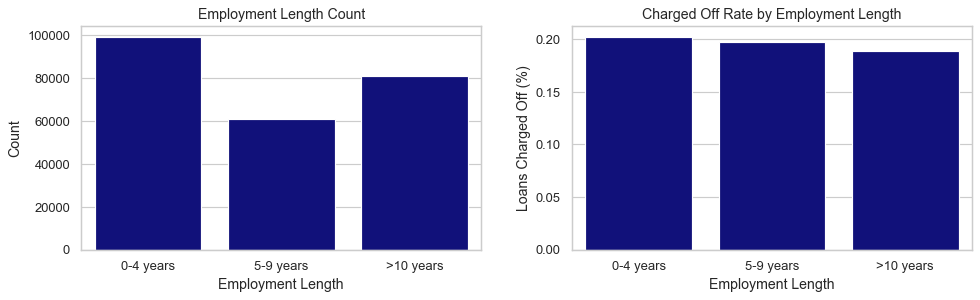

In [37]:
fig5, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4), dpi=85)

## Create histogram for Employment Length Count
emp_length_count = df5.groupby('emp_length')['loan_status'].value_counts().loc[:,'Charged Off']
fig5_1 = sns.barplot(x=emp_length_count.index, y=emp_length_count.values, color='#00008b', ax=axes[0])
fig5_1.set_xlabel('Employment Length')
fig5_1.set_ylabel('Count')
fig5_1.set_title('Employment Length Count')

## Create histogram for Charged Off Rate by Employment Length
charge_off_rates = df5.groupby('emp_length')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
fig5_2 = sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#00008b', ax=axes[1])
fig5_2.set_xlabel('Employment Length')
fig5_2.set_ylabel('Loans Charged Off (%)')
fig5_2.set_title('Charged Off Rate by Employment Length')

fig5.tight_layout(pad=2.0)

### 4.6 grade

Definition as per LendingClub's data dictionary: "LC assigned loan grade."

Summary statistic:

In [38]:
df5.grade.value_counts(dropna=False).sort_index()

A    226243
B    380152
C    369928
D    195280
E     91570
F     31483
G      8951
Name: grade, dtype: int64

To allow for a more meaning model, grade will be recoded to be integers with <b>7</b> being the highest grade and <b>1</b> being the lowest.

In [39]:
#replace all grade values with 1-7, since ordinal value
df5.grade = df5.grade.replace(to_replace =['A','B','C','D','E','F','G'], value =[7,6,5,4,3,2,1])
df5.grade.value_counts(dropna=False)

6    380152
5    369928
7    226243
4    195280
3     91570
2     31483
1      8951
Name: grade, dtype: int64

Data visualization:

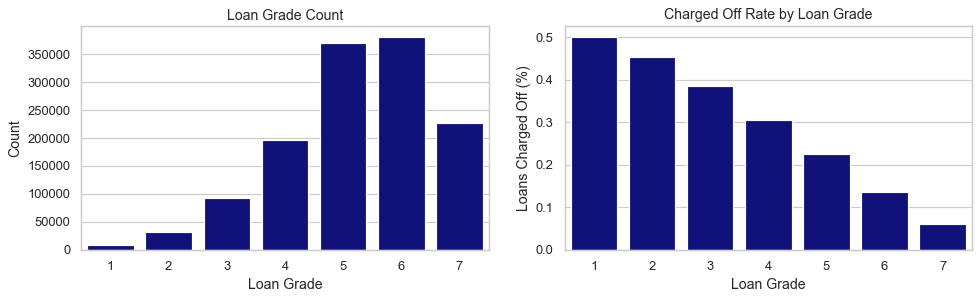

In [40]:
fig6, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4), dpi=85)

## Create histogram for Delinquency Latest 2 Years Count
fig6_1 = sns.countplot(df5['grade'], order=sorted(df5['grade'].unique()), color='#00008b', ax=axes[0])
fig6_1.set_xlabel('Loan Grade')
fig6_1.set_ylabel('Count')
fig6_1.set_title('Loan Grade Count')

## Create histogram for Charged Off Rate by Delinquency Latest 2 Years
charge_off_rates = df5.groupby('grade')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
fig6_2 = sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#00008b', ax=axes[1])
fig6_2.set_xlabel('Loan Grade')
fig6_2.set_ylabel('Loans Charged Off (%)')
fig6_2.set_title('Charged Off Rate by Loan Grade')

fig6.tight_layout(pad=2.0)

### 4.7 home_ownership

Definition as per LendingClub's data dictionary: "The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER."

In [41]:
df5.home_ownership.value_counts(dropna=False).sort_index()

ANY            267
MORTGAGE    645496
NONE            48
OTHER          144
OWN         139844
RENT        517808
Name: home_ownership, dtype: int64

According to LendingClub's data dictionary, there are neither ANY nor NONE values. We will recode both values into <b>OTHER</b>:

In [42]:
df5.home_ownership = df5.home_ownership.replace(to_replace = ['ANY', 'NONE'], 
                                                value = 'OTHER')
df5.home_ownership.value_counts()

MORTGAGE    645496
RENT        517808
OWN         139844
OTHER          459
Name: home_ownership, dtype: int64

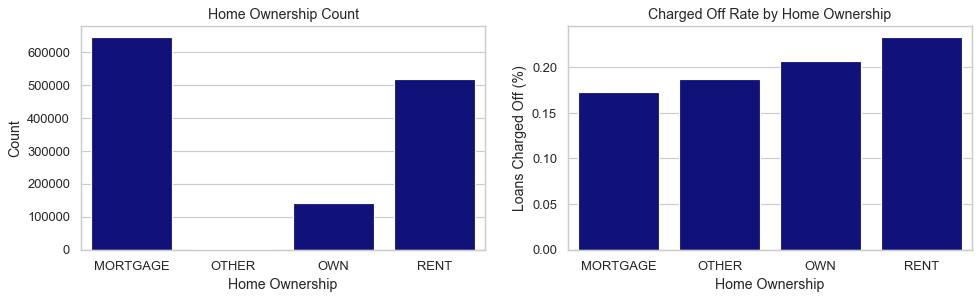

In [43]:
fig7, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4), dpi=85)

## Create histogram for Delinquency Latest 2 Years Count
fig7_1 = sns.countplot(df5['home_ownership'], order=sorted(df5['home_ownership'].unique()), color='#00008b', ax=axes[0])
fig7_1.set_xlabel('Home Ownership')
fig7_1.set_ylabel('Count')
fig7_1.set_title('Home Ownership Count')

## Create histogram for Charged Off Rate by Delinquency Latest 2 Years
charge_off_rates = df5.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
fig7_2 = sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#00008b', ax=axes[1])
fig7_2.set_xlabel('Home Ownership')
fig7_2.set_ylabel('Loans Charged Off (%)')
fig7_2.set_title('Charged Off Rate by Home Ownership')

fig7.tight_layout(pad=2.0)

### 4.8 inq_last_6mths

Definition as per LendingClub's data dictionary: "The number of inquiries in past 6 months (excluding auto and mortgage inquiries)."

Summary statistics:

In [44]:
df5.inq_last_6mths.describe()

count   1303606.00
mean          0.66
std           0.94
min           0.00
25%           0.00
50%           0.00
75%           1.00
max           8.00
Name: inq_last_6mths, dtype: float64

Data visualization:

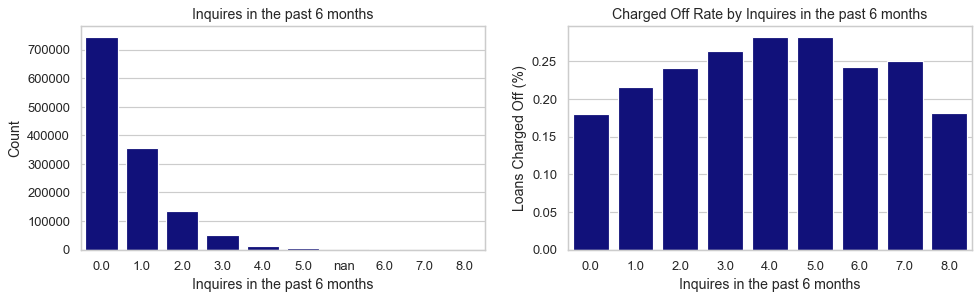

In [45]:
fig8, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4), dpi=85)

## Create histogram for Delinquency Latest 2 Years Count
fig8_1 = sns.countplot(df5['inq_last_6mths'], order=sorted(df5['inq_last_6mths'].unique()), color='#00008b', ax=axes[0])
fig8_1.set_xlabel('Inquires in the past 6 months')
fig8_1.set_ylabel('Count')
fig8_1.set_title('Inquires in the past 6 months')

## Create histogram for Charged Off Rate by Delinquency Latest 2 Years
charge_off_rates = df5.groupby('inq_last_6mths')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
fig8_2 = sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#00008b', ax=axes[1])
fig8_2.set_xlabel('Inquires in the past 6 months')
fig8_2.set_ylabel('Loans Charged Off (%)')
fig8_2.set_title('Charged Off Rate by Inquires in the past 6 months')

fig8.tight_layout(pad=2.0)

In [46]:
df5.groupby('loan_status')['inq_last_6mths'].describe()

count  mean  std  min  25%  50%  75%  max
loan_status                                               
Charged Off  261655.00  0.78 1.02 0.00 0.00 0.00 1.00 8.00
Fully Paid  1041951.00  0.63 0.92 0.00 0.00 0.00 1.00 8.00

### 4.9 Installment

Definition as per LendingClub's data dictionary: "The monthly payment owed by the borrower if the loan originates."

Summary statistics:

In [47]:
df5.installment.describe()

count   1303607.00
mean        438.08
std         261.06
min           4.93
25%         248.82
50%         375.43
75%         580.45
max        1719.83
Name: installment, dtype: float64

Data visualization:

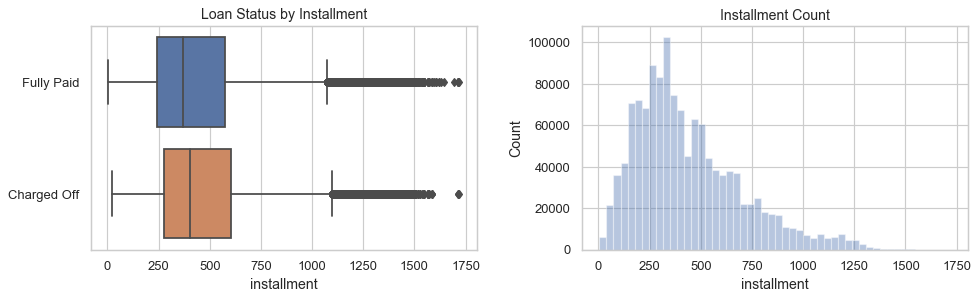

In [48]:
fig9, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4), dpi=85)

## Create boxplot for Loan Status by Log Average Current Balance
fig9_1 = sns.boxplot(x='installment', y='loan_status', data=df5, ax=axes[0])
fig9_1.set_ylabel('')
fig9_1.set_title('Loan Status by Installment')

## Create histogram for log_annual_inc Count
fig9_2 = sns.distplot(df5.loc[df5['installment'].notnull(), 'installment'], kde=False, ax=axes[1])
fig9_2.set_ylabel('Count')
fig9_2.set_title('Installment Count')

fig9.tight_layout(pad=2.0)

### 4.10 int_rate

Definition as per LendingClub's data dictionary: "Interest Rate on the loan."

Summary statistics:

In [49]:
df5.installment.describe()

count   1303607.00
mean        438.08
std         261.06
min           4.93
25%         248.82
50%         375.43
75%         580.45
max        1719.83
Name: installment, dtype: float64

Data visualization:

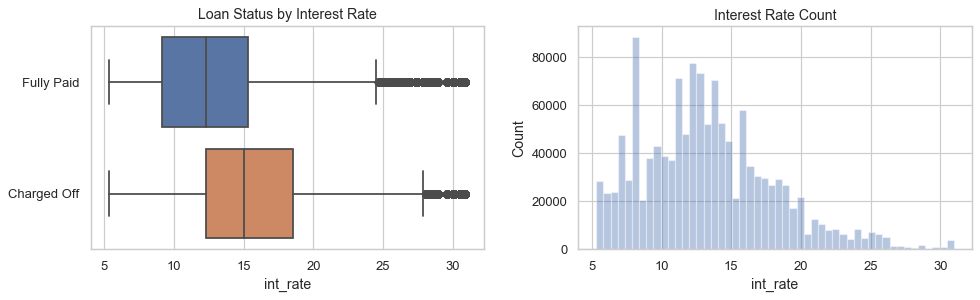

In [50]:
fig10, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4), dpi=85)

## Create boxplot for Loan Status by Interest Rate
fig10_1 = sns.boxplot(x='int_rate', y='loan_status', data=df5, ax=axes[0])
fig10_1.set_ylabel('')
fig10_1.set_title('Loan Status by Interest Rate')

## Create histogram for Interest Rate Count
fig10_2 = sns.distplot(df5.loc[df5['int_rate'].notnull(), 'int_rate'], kde=False, ax=axes[1])
fig10_2.set_ylabel('Count')
fig10_2.set_title('Interest Rate Count')

fig10.tight_layout(pad=2.0)

### 4.11 loan_amnt

Definition as per LendingClub's data dictionary: "The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."

Summary statistics:

In [51]:
df5.loan_amnt.describe()

count   1303607.00
mean      14416.81
std        8699.54
min         500.00
25%        8000.00
50%       12000.00
75%       20000.00
max       40000.00
Name: loan_amnt, dtype: float64

Data visualization:

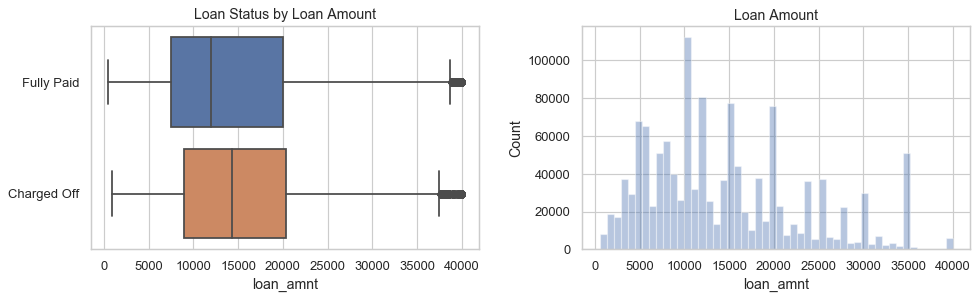

In [52]:
fig11, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4), dpi=85)

## Create boxplot for Loan Status by Loan Amount
fig11_1 = sns.boxplot(x='loan_amnt', y='loan_status', data=df5, ax=axes[0])
fig11_1.set_ylabel('')
fig11_1.set_title('Loan Status by Loan Amount')

## Create histogram for Loan Amount
fig11_2 = sns.distplot(df5.loc[df5['loan_amnt'].notnull(), 'loan_amnt'], kde=False, ax=axes[1])
fig11_2.set_ylabel('Count')
fig11_2.set_title('Loan Amount')

fig11.tight_layout(pad=2.0)

### 4.12 num_tl_90g_dpd_24m

Definition as per LendingClub's data dictionary: "Number of accounts 90 or more days past due in last 24 months."

Summary statistics:

In [53]:
pd.options.display.float_format = "{:.2f}".format
df5.num_tl_90g_dpd_24m.describe()

count   1236080.00
mean          0.09
std           0.50
min           0.00
25%           0.00
50%           0.00
75%           0.00
max          39.00
Name: num_tl_90g_dpd_24m, dtype: float64

Removing outliers outside of the 99th percentile:

In [54]:
df5.num_tl_90g_dpd_24m = df5.num_tl_90g_dpd_24m[df5.num_tl_90g_dpd_24m.between(df5.num_tl_90g_dpd_24m.quantile(0), df5.num_tl_90g_dpd_24m.quantile(.99))]
df5.num_tl_90g_dpd_24m.describe()

count   1228767.00
mean          0.06
std           0.27
min           0.00
25%           0.00
50%           0.00
75%           0.00
max           2.00
Name: num_tl_90g_dpd_24m, dtype: float64

Data visualization:

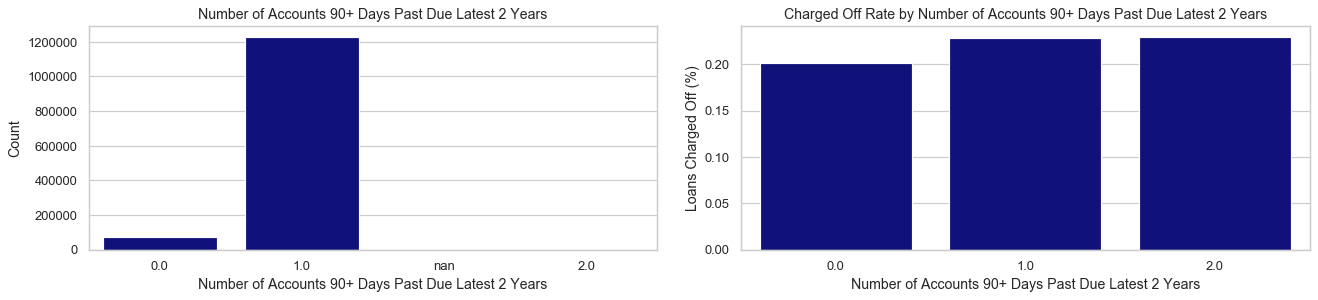

In [55]:
fig12, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4), dpi=85)

## Create histogram for Delinquency Latest 2 Years Count
fig12_1 = sns.countplot(df5['num_tl_90g_dpd_24m'].notnull(), order=sorted(df5['num_tl_90g_dpd_24m'].unique()), color='#00008b', ax=axes[0])
fig12_1.set_xlabel('Number of Accounts 90+ Days Past Due Latest 2 Years')
fig12_1.set_ylabel('Count')
fig12_1.set_title('Number of Accounts 90+ Days Past Due Latest 2 Years')

## Create histogram for Charged Off Rate by Delinquency Latest 2 Years
charge_off_rates = df5.groupby('num_tl_90g_dpd_24m')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
fig12_2 = sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#00008b', ax=axes[1])
fig12_2.set_xlabel('Number of Accounts 90+ Days Past Due Latest 2 Years')
fig12_2.set_ylabel('Loans Charged Off (%)')
fig12_2.set_title('Charged Off Rate by Number of Accounts 90+ Days Past Due Latest 2 Years')

fig12.tight_layout(pad=2.0)

In [56]:
df5.groupby('loan_status')['num_tl_90g_dpd_24m'].describe()

count  mean  std  min  25%  50%  75%  max
loan_status                                              
Charged Off 249714.00  0.07 0.29 0.00 0.00 0.00 0.00 2.00
Fully Paid  979053.00  0.06 0.27 0.00 0.00 0.00 0.00 2.00

### 4.13 pub_rec

Definition as per LendingClub's data dictionary: "Number of derogatory public records."

Summary statistics:

In [57]:
df5.pub_rec.describe()

count   1303607.00
mean          0.22
std           0.60
min           0.00
25%           0.00
50%           0.00
75%           0.00
max          86.00
Name: pub_rec, dtype: float64

Removing outliers outside of the 99th percentile:

In [58]:
df5.pub_rec = df5.pub_rec[df5.pub_rec.between(df5.pub_rec.quantile(0), df5.pub_rec.quantile(.99))]
df5.pub_rec.describe()

count   1291359.00
mean          0.18
std           0.43
min           0.00
25%           0.00
50%           0.00
75%           0.00
max           2.00
Name: pub_rec, dtype: float64

Data visualization:

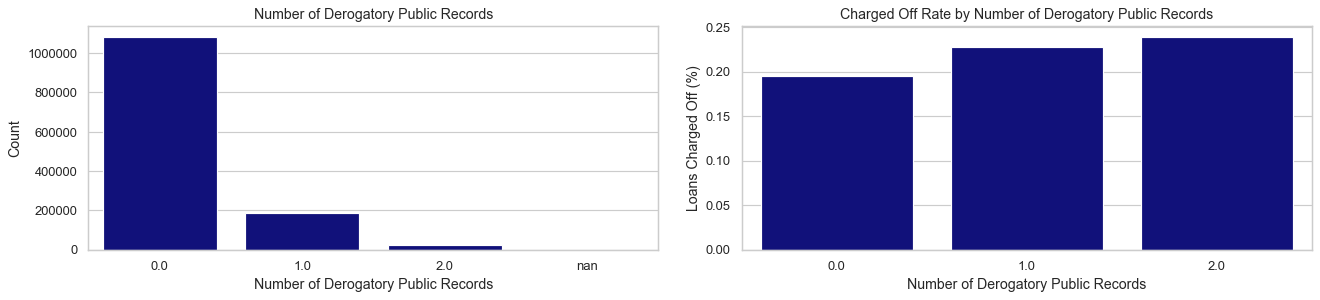

In [59]:
fig13, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4), dpi=85)

## Create histogram for Delinquency Latest 2 Years Count
fig13_1 = sns.countplot(df5['pub_rec'], order=sorted(df5['pub_rec'].unique()), color='#00008b', ax=axes[0])
fig13_1.set_xlabel('Number of Derogatory Public Records')
fig13_1.set_ylabel('Count')
fig13_1.set_title('Number of Derogatory Public Records')

## Create histogram for Charged Off Rate by Delinquency Latest 2 Years
charge_off_rates = df5.groupby('pub_rec')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
fig13_2 = sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#00008b', ax=axes[1])
fig13_2.set_xlabel('Number of Derogatory Public Records')
fig13_2.set_ylabel('Loans Charged Off (%)')
fig13_2.set_title('Charged Off Rate by Number of Derogatory Public Records')

fig13.tight_layout(pad=2.0)

In [60]:
df5.groupby('loan_status')['pub_rec'].describe()

count  mean  std  min  25%  50%  75%  max
loan_status                                               
Charged Off  258806.00  0.21 0.46 0.00 0.00 0.00 0.00 2.00
Fully Paid  1032553.00  0.17 0.42 0.00 0.00 0.00 0.00 2.00

### 4.14 purpose

Definition as per LendingClub's data dictionary: "A category provided by the borrower for the loan request."

Summary statistics:

In [61]:
df5.purpose.value_counts()

debt_consolidation    757591
credit_card           285704
home_improvement       84495
other                  74934
major_purchase         28328
medical                15023
small_business         15010
car                    14120
moving                  9172
vacation                8732
house                   6967
wedding                 2294
renewable_energy         911
educational              326
Name: purpose, dtype: int64

In [62]:
df5.purpose = df5.purpose.replace(to_replace = ['major_purchase','car','home_improvement','vacation','wedding','educational','medical','small_business','moving','house','renewable_energy'],
                                  value = 'personal')
df5.purpose.value_counts()

debt_consolidation    757591
credit_card           285704
personal              185378
other                  74934
Name: purpose, dtype: int64

Data visualization:

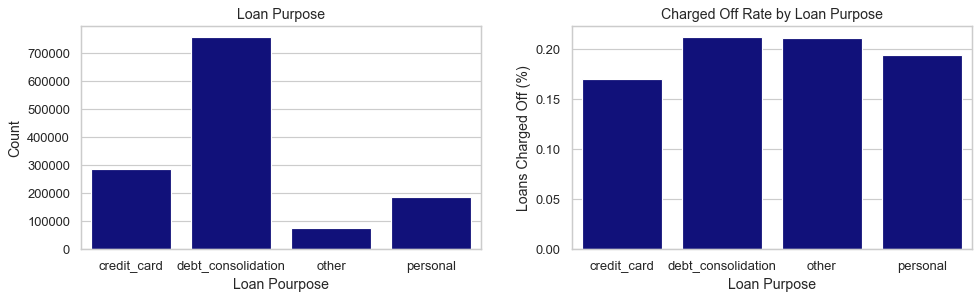

In [63]:
fig14, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4), dpi=85)

## Create histogram for Delinquency Latest 2 Years Count
fig14_1 = sns.countplot(df5['purpose'], order=sorted(df5['purpose'].unique()), color='#00008b', ax=axes[0])
fig14_1.set_xlabel('Loan Pourpose')
fig14_1.set_ylabel('Count')
fig14_1.set_title('Loan Purpose')

## Create histogram for Charged Off Rate by Delinquency Latest 2 Years
charge_off_rates = df5.groupby('purpose')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
fig14_2 = sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#00008b', ax=axes[1])
fig14_2.set_xlabel('Loan Purpose')
fig14_2.set_ylabel('Loans Charged Off (%)')
fig14_2.set_title('Charged Off Rate by Loan Purpose')

fig14.tight_layout(pad=2.0)

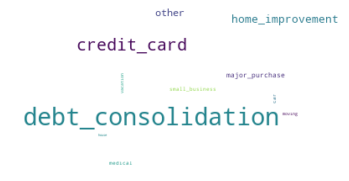

In [64]:
purpose_df = pd.DataFrame(df2["purpose"].value_counts())
purpose_df=purpose_df.reset_index()
purpose_dic=purpose_df.set_index('index').T.to_dict('list')
purpose_dic2={i:int(j[0]) for i,j in purpose_dic.items() }
#pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(background_color="white").generate_from_frequencies(purpose_dic2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 4.15 term

Definition as per LendingClub's data dictionary: "The number of payments on the loan. Values are in months and can be either 36 or 60."

Statistic summary:

In [65]:
df5.term.value_counts(dropna=False)

 36 months    988754
 60 months    314853
Name: term, dtype: int64

Data visualization:

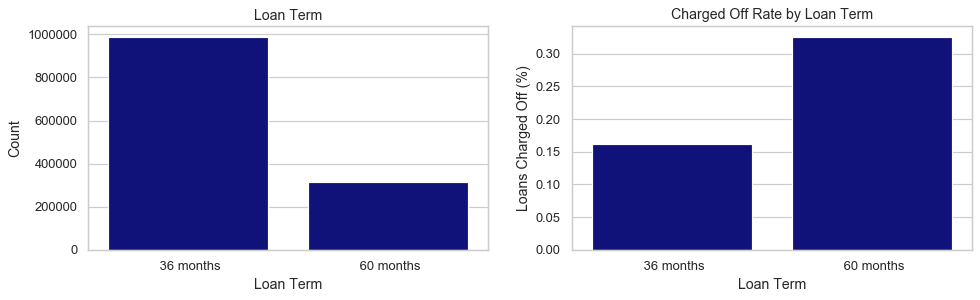

In [66]:
fig15, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4), dpi=85)

## Create histogram for Delinquency Latest 2 Years Count
fig15_1 = sns.countplot(df5['term'], order=sorted(df5['term'].unique()), color='#00008b', ax=axes[0])
fig15_1.set_xlabel('Loan Term')
fig15_1.set_ylabel('Count')
fig15_1.set_title('Loan Term')

## Create histogram for Charged Off Rate by Delinquency Latest 2 Years
charge_off_rates = df5.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
fig15_2 = sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#00008b', ax=axes[1])
fig15_2.set_xlabel('Loan Term')
fig15_2.set_ylabel('Loans Charged Off (%)')
fig15_2.set_title('Charged Off Rate by Loan Term')

fig15.tight_layout(pad=2.0)

### 4.16 emp_title

Definition as per LendingClub's data dictionary: "The job title supplied by the Borrower when applying for the loan."

Summary statistics:

In [67]:
dfempcounts = df2.emp_title.value_counts()
dfempcounts.head()

Teacher             20496
Manager             18704
Owner                9803
Registered Nurse     8477
RN                   8253
Name: emp_title, dtype: int64

Data visualization:

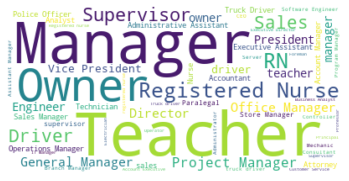

In [68]:
emp_title_df = pd.DataFrame(df2["emp_title"].value_counts())
emp_title_df=emp_title_df.reset_index()
emp_title_df.head()
emp_title_dic=emp_title_df.set_index('index').T.to_dict('list')
emp_title_dic2={i:int(j[0]) for i,j in emp_title_dic.items() }
#pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(background_color="white").generate_from_frequencies(emp_title_dic2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [69]:
dfet=df2['emp_title'].isna().sum()
dfet = df2.dropna(axis=0, how='any')
print(dfet.isna().sum())
dfet.shape

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prnc

(955257, 87)

In [70]:
dfet4=dfet.loc[(dfet['emp_title']=='Teacher') | (dfet['emp_title']=='Manager') | (dfet['emp_title']=='Owner') | (dfet['emp_title']=='Registered Nurse')]
dfet4.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
170       20000        20000         20000.00   36 months      7.56   
296        2500         2500          2475.00   36 months     13.56   
576       12950        12950         12950.00   36 months      7.56   
2175       3000         3000          3000.00   36 months     19.92   
3628       4500         4500          4500.00   36 months     10.72   

      installment grade sub_grade emp_title emp_length home_ownership  \
170        622.68     A        A3   Teacher  10+ years       MORTGAGE   
296         84.92     C        C1   Manager    5 years           RENT   
576        403.19     A        A3   Teacher  10+ years       MORTGAGE   
2175       111.37     D        D3   Teacher     1 year           RENT   
3628       146.73     B        B2   Teacher    9 years           RENT   

      annual_inc verification_status   issue_d loan_status pymnt_plan  \
170    100000.00        Not Verified  Dec-2018  Fully Paid          n   
296     42000.00        Not Verified  Dec-2018  Fully Paid          n   
576     55000.00     Source Verified  Dec-2018  Fully Paid          n   
2175    62000.00        Not Verified  Dec-2018  Fully Paid          n   
3628    55000.00        Not Verified  Dec-2018  Fully Paid          n   

                 purpose                    title zip_code addr_state   dti  \
170          credit_card  Credit card refinancing    982xx         WA 18.92   
296                other                    Other    194xx         PA 15.09   
576   debt_consolidation       Debt consolidation    850xx         AZ 19.88   
2175  debt_consolidation       Debt consolidation    781xx         TX 24.29   
3628  debt_consolidation       Debt consolidation    349xx         FL  7.92   

      delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  \
170          0.00         Feb-1999            0.00      9.00     0.00   
296          0.00         Mar-2004            0.00      3.00     0.00   
576          0.00         Dec-2005            1.00     15.00     0.00   
2175         0.00         Jun-1993            2.00      6.00     0.00   
3628         0.00         May-2005            1.00      5.00     0.00   

      revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
170       25416       29.90      19.00                   w       0.00   
296        3319       31.60       6.00                   f       0.00   
576        2160        5.00      24.00                   w       0.00   
2175       2334       37.60      24.00                   w       0.00   
3628          0        0.00      35.00                   w       0.00   

      out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
170            0.00     20215.79         20215.79         20000.00   
296            0.00      2501.29          2476.27          2500.00   
576            0.00     13020.71         13020.71         12950.00   
2175           0.00      3046.45          3046.45          3000.00   
3628           0.00      4510.91          4510.91          4500.00   

      total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
170          215.79                0.00        0.00                     0.00   
296            1.29                0.00        0.00                     0.00   
576           70.71                0.00        0.00                     0.00   
2175          46.45                0.00        0.00                     0.00   
3628          10.91                0.00        0.00                     0.00   

     last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
170      Feb-2019         20228.39           Feb-2019   
296      Jan-2019          2504.11           Jan-2019   
576      Feb-2019         13028.87           Jan-2019   
2175     Feb-2019          3051.43           Jan-2019   
3628     Jan-2019          4517.61           Jan-2019   

      collections_12_mths_ex_med  policy_code application_type  \
170                         0.00     

In [71]:
import plotly.express as px
fig = px.treemap(dfet4, path=['emp_title','loan_status'])
fig.show()

In [72]:
dfet4.loan_status = dfet4.loan_status.replace(to_replace = 'Fully Paid',
                                         value = 1)
dfet4.loan_status = dfet4.loan_status.replace(to_replace = 'Charged Off',
                                         value = 0)
dfet4.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
170       20000        20000         20000.00   36 months      7.56   
296        2500         2500          2475.00   36 months     13.56   
576       12950        12950         12950.00   36 months      7.56   
2175       3000         3000          3000.00   36 months     19.92   
3628       4500         4500          4500.00   36 months     10.72   

      installment grade sub_grade emp_title emp_length home_ownership  \
170        622.68     A        A3   Teacher  10+ years       MORTGAGE   
296         84.92     C        C1   Manager    5 years           RENT   
576        403.19     A        A3   Teacher  10+ years       MORTGAGE   
2175       111.37     D        D3   Teacher     1 year           RENT   
3628       146.73     B        B2   Teacher    9 years           RENT   

      annual_inc verification_status   issue_d  loan_status pymnt_plan  \
170    100000.00        Not Verified  Dec-2018            1          n   
296     42000.00        Not Verified  Dec-2018            1          n   
576     55000.00     Source Verified  Dec-2018            1          n   
2175    62000.00        Not Verified  Dec-2018            1          n   
3628    55000.00        Not Verified  Dec-2018            1          n   

                 purpose                    title zip_code addr_state   dti  \
170          credit_card  Credit card refinancing    982xx         WA 18.92   
296                other                    Other    194xx         PA 15.09   
576   debt_consolidation       Debt consolidation    850xx         AZ 19.88   
2175  debt_consolidation       Debt consolidation    781xx         TX 24.29   
3628  debt_consolidation       Debt consolidation    349xx         FL  7.92   

      delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  \
170          0.00         Feb-1999            0.00      9.00     0.00   
296          0.00         Mar-2004            0.00      3.00     0.00   
576          0.00         Dec-2005            1.00     15.00     0.00   
2175         0.00         Jun-1993            2.00      6.00     0.00   
3628         0.00         May-2005            1.00      5.00     0.00   

      revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
170       25416       29.90      19.00                   w       0.00   
296        3319       31.60       6.00                   f       0.00   
576        2160        5.00      24.00                   w       0.00   
2175       2334       37.60      24.00                   w       0.00   
3628          0        0.00      35.00                   w       0.00   

      out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
170            0.00     20215.79         20215.79         20000.00   
296            0.00      2501.29          2476.27          2500.00   
576            0.00     13020.71         13020.71         12950.00   
2175           0.00      3046.45          3046.45          3000.00   
3628           0.00      4510.91          4510.91          4500.00   

      total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
170          215.79                0.00        0.00                     0.00   
296            1.29                0.00        0.00                     0.00   
576           70.71                0.00        0.00                     0.00   
2175          46.45                0.00        0.00                     0.00   
3628          10.91                0.00        0.00                     0.00   

     last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
170      Feb-2019         20228.39           Feb-2019   
296      Jan-2019          2504.11           Jan-2019   
576      Feb-2019         13028.87           Jan-2019   
2175     Feb-2019          3051.43           Jan-2019   
3628     Jan-2019          4517.61           Jan-2019   

      collections_12_mths_ex_med  policy_code application_type  \
170                         0.0

In [73]:
#teacher emp_title
teacher=dfet4[dfet4["emp_title"]=="Teacher"]
teacher.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
170       20000        20000         20000.00   36 months      7.56   
576       12950        12950         12950.00   36 months      7.56   
2175       3000         3000          3000.00   36 months     19.92   
3628       4500         4500          4500.00   36 months     10.72   
4933       6000         6000          6000.00   36 months     15.02   

      installment grade sub_grade emp_title emp_length home_ownership  \
170        622.68     A        A3   Teacher  10+ years       MORTGAGE   
576        403.19     A        A3   Teacher  10+ years       MORTGAGE   
2175       111.37     D        D3   Teacher     1 year           RENT   
3628       146.73     B        B2   Teacher    9 years           RENT   
4933       208.06     C        C3   Teacher  10+ years       MORTGAGE   

      annual_inc verification_status   issue_d  loan_status pymnt_plan  \
170    100000.00        Not Verified  Dec-2018            1          n   
576     55000.00     Source Verified  Dec-2018            1          n   
2175    62000.00        Not Verified  Dec-2018            1          n   
3628    55000.00        Not Verified  Dec-2018            1          n   
4933   101000.00        Not Verified  Dec-2018            1          n   

                 purpose                    title zip_code addr_state   dti  \
170          credit_card  Credit card refinancing    982xx         WA 18.92   
576   debt_consolidation       Debt consolidation    850xx         AZ 19.88   
2175  debt_consolidation       Debt consolidation    781xx         TX 24.29   
3628  debt_consolidation       Debt consolidation    349xx         FL  7.92   
4933            vacation                 Vacation    917xx         CA  6.00   

      delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  \
170          0.00         Feb-1999            0.00      9.00     0.00   
576          0.00         Dec-2005            1.00     15.00     0.00   
2175         0.00         Jun-1993            2.00      6.00     0.00   
3628         0.00         May-2005            1.00      5.00     0.00   
4933         2.00         Sep-2002            0.00     10.00     0.00   

      revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
170       25416       29.90      19.00                   w       0.00   
576        2160        5.00      24.00                   w       0.00   
2175       2334       37.60      24.00                   w       0.00   
3628          0        0.00      35.00                   w       0.00   
4933      20803       73.00      18.00                   w       0.00   

      out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
170            0.00     20215.79         20215.79         20000.00   
576            0.00     13020.71         13020.71         12950.00   
2175           0.00      3046.45          3046.45          3000.00   
3628           0.00      4510.91          4510.91          4500.00   
4933           0.00      6087.12          6087.12          6000.00   

      total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
170          215.79                0.00        0.00                     0.00   
576           70.71                0.00        0.00                     0.00   
2175          46.45                0.00        0.00                     0.00   
3628          10.91                0.00        0.00                     0.00   
4933          87.12                0.00        0.00                     0.00   

     last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
170      Feb-2019         20228.39           Feb-2019   
576      Feb-2019         13028.87           Jan-2019   
2175     Feb-2019          3051.43           Jan-2019   
3628     Jan-2019          4517.61           Jan-2019   
4933     Jan-2019          6097.13           Feb-2019   

      collections_12_mths_ex_med  policy_code application_type  \
170                         0.0

In [74]:
#manager emp_title
manager=dfet4[dfet4["emp_title"]=="Manager"]
manager.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
296         2500         2500          2475.00   36 months     13.56   
5865       29000        29000         29000.00   36 months      8.19   
6064       13525        13525         13525.00   36 months     15.02   
12596       1000         1000          1000.00   36 months     11.80   
36438      28925        28925         28925.00   36 months     16.14   

       installment grade sub_grade emp_title emp_length home_ownership  \
296          84.92     C        C1   Manager    5 years           RENT   
5865        911.30     A        A4   Manager  10+ years       MORTGAGE   
6064        468.99     C        C3   Manager    5 years           RENT   
12596        33.12     B        B4   Manager    3 years           RENT   
36438      1018.92     C        C4   Manager  10+ years       MORTGAGE   

       annual_inc verification_status   issue_d  loan_status pymnt_plan  \
296      42000.00        Not Verified  Dec-2018            1          n   
5865     59000.00     Source Verified  Dec-2018            1          n   
6064    144000.00     Source Verified  Dec-2018            1          n   
12596    48000.00        Not Verified  Dec-2018            1          n   
36438   110000.00        Not Verified  Dec-2018            1          n   

                  purpose                    title zip_code addr_state   dti  \
296                 other                    Other    194xx         PA 15.09   
5865          credit_card  Credit card refinancing    606xx         IL 21.25   
6064   debt_consolidation       Debt consolidation    430xx         OH 26.78   
12596               other                    Other    054xx         VT 17.88   
36438         credit_card  Credit card refinancing    117xx         NY 19.53   

       delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  \
296           0.00         Mar-2004            0.00      3.00     0.00   
5865          0.00         Jun-1984            0.00     15.00     0.00   
6064          1.00         Sep-2011            1.00     23.00     0.00   
12596         0.00         Dec-1999            2.00     21.00     0.00   
36438         0.00         Jun-2002            0.00     11.00     0.00   

       revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
296         3319       31.60       6.00                   f       0.00   
5865        7859       15.60      34.00                   w       0.00   
6064       27019       27.70      31.00                   w       0.00   
12596       4734        5.70      43.00                   f       0.00   
36438      51952       77.00      26.00                   w       0.00   

       out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
296             0.00      2501.29          2476.27          2500.00   
5865            0.00     29197.28         29197.28         29000.00   
6064            0.00     13543.28         13543.28         13525.00   
12596           0.00      1008.52          1008.52          1000.00   
36438           0.00     29668.67         29668.67         28925.00   

       total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
296             1.29                0.00        0.00                     0.00   
5865          197.28                0.00        0.00                     0.00   
6064           18.28                0.00        0.00                     0.00   
12596           8.52                0.00        0.00                     0.00   
36438         743.67                0.00        0.00                     0.00   

      last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
296       Jan-2019          2504.11           Jan-2019   
5865      Jan-2019         29223.67           Jan-2019   
6064      Jan-2019         13554.57           Feb-2019   
12596     Jan-2019          1009.18           Jan-2019   
36438     Feb-2019         28675.69           Feb-2019   

       collections_12_mths_ex_med  policy_co

In [75]:
#Owner emp_title
owner=dfet4[dfet4["emp_title"]=="Owner"]
owner.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
34683       21000        21000         21000.00   36 months      6.46   
64909        5500         5500          5500.00   36 months     14.47   
99041       40000        40000         40000.00   36 months      8.46   
123996      40000        40000         40000.00   36 months      6.11   
131993      40000        40000         40000.00   36 months      6.11   

        installment grade sub_grade emp_title emp_length home_ownership  \
34683        643.25     A        A1     Owner  10+ years           RENT   
64909        189.24     C        C2     Owner     1 year            OWN   
99041       1261.97     A        A5     Owner  10+ years       MORTGAGE   
123996      1218.88     A        A1     Owner  10+ years       MORTGAGE   
131993      1218.88     A        A1     Owner    3 years           RENT   

        annual_inc verification_status   issue_d  loan_status pymnt_plan  \
34683     88450.00     Source Verified  Dec-2018            1          n   
64909     34000.00     Source Verified  Nov-2018            1          n   
99041    180000.00            Verified  Oct-2018            0          n   
123996   100000.00        Not Verified  Oct-2018            1          n   
131993   300000.00     Source Verified  Sep-2018            1          n   

                   purpose                    title zip_code addr_state   dti  \
34683   debt_consolidation       Debt consolidation    775xx         TX  5.71   
64909       small_business                 Business    770xx         TX  5.47   
99041   debt_consolidation       Debt consolidation    200xx         DC 11.47   
123996         credit_card  Credit card refinancing    440xx         OH 15.40   
131993  debt_consolidation       Debt consolidation    916xx         CA  1.83   

        delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  \
34683          0.00         Feb-1967            1.00      8.00     0.00   
64909          0.00         May-2011            3.00      6.00     0.00   
99041          1.00         Oct-1988            0.00      9.00     0.00   
123996         0.00         Feb-1988            0.00     15.00     0.00   
131993         0.00         Apr-2003            0.00     19.00     0.00   

        revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
34683       12887       17.20      22.00                   w       0.00   
64909        2931       29.60       9.00                   w       0.00   
99041      120355       80.80      21.00                   w       0.00   
123996      44394       31.90      57.00                   w       0.00   
131993      28283       20.40      33.00                   w       0.00   

        out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
34683            0.00     21276.52         21276.52         21000.00   
64909            0.00      5557.48          5557.48          5500.00   
99041            0.00      1243.17          1243.17           979.97   
123996           0.00     40142.56         40142.56         40000.00   
131993           0.00     40446.57         40446.57         40000.00   

        total_rec_int  total_rec_late_fee  recoveries  \
34683          276.52                0.00        0.00   
64909           57.48                0.00        0.00   
99041          263.20                0.00        0.00   
123996         142.56                0.00        0.00   
131993         446.57                0.00        0.00   

        collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
34683                      0.00     Feb-2019         20640.81   
64909                      0.00     Dec-2018          5561.90   
99041                      0.00     Nov-2018          1261.97   
123996                     0.00     Oct-2018         40156.14   
131993                     0.00     Nov-2018         39241.27   

       last_credit_pull_d  collections_12_mths_ex_med  policy_code  \
34683            Feb-2019          

In [76]:
#Registered Nurse emp_title
registerednurse=dfet4[dfet4["emp_title"]=="Registered Nurse"]
registerednurse.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
7635       26000        26000         26000.00   60 months     11.80   
34209       2800         2800          2800.00   36 months     12.98   
39899       8400         8400          8400.00   36 months     11.31   
46124      15000        15000         15000.00   36 months     17.97   
51593       4000         4000          4000.00   36 months     25.34   

       installment grade sub_grade         emp_title emp_length  \
7635        575.74     B        B4  Registered Nurse  10+ years   
34209        94.32     B        B5  Registered Nurse  10+ years   
39899       276.25     B        B3  Registered Nurse    6 years   
46124       542.07     D        D1  Registered Nurse     1 year   
51593       159.76     E        E3  Registered Nurse     1 year   

      home_ownership  annual_inc verification_status   issue_d  loan_status  \
7635        MORTGAGE    77000.00        Not Verified  Dec-2018            1   
34209       MORTGAGE    73000.00            Verified  Dec-2018            1   
39899           RENT    65000.00     Source Verified  Dec-2018            1   
46124           RENT    90000.00     Source Verified  Nov-2018            1   
51593       MORTGAGE    55000.00        Not Verified  Nov-2018            1   

      pymnt_plan             purpose               title zip_code addr_state  \
7635           n  debt_consolidation  Debt consolidation    083xx         NJ   
34209          n  debt_consolidation  Debt consolidation    853xx         AZ   
39899          n      major_purchase      Major purchase    801xx         CO   
46124          n  debt_consolidation  Debt consolidation    104xx         NY   
51593          n    home_improvement    Home improvement    461xx         IN   

        dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  \
7635  18.75         0.00         Apr-2005            0.00      4.00     0.00   
34209 33.01         0.00         Dec-2001            0.00     14.00     1.00   
39899 15.55         0.00         Aug-2005            0.00      6.00     0.00   
46124  5.37         0.00         May-2007            0.00     18.00     0.00   
51593 25.77         2.00         Nov-1995            0.00     17.00     0.00   

       revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
7635       20392       94.80      12.00                   w       0.00   
34209      45077       35.90      23.00                   w       0.00   
39899      17726       90.90      32.00                   w       0.00   
46124      10161       25.70      22.00                   w       0.00   
51593       9156       89.80      33.00                   w       0.00   

       out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
7635            0.00     26381.61         26381.61         26000.00   
34209           0.00      2821.20          2821.20          2800.00   
39899           0.00      8561.26          8561.26          8400.00   
46124           0.00     15134.77         15134.77         15000.00   
51593           0.00      4191.18          4191.18          4000.00   

       total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
7635          381.61                0.00        0.00                     0.00   
34209          21.20                0.00        0.00                     0.00   
39899         161.26                0.00        0.00                     0.00   
46124         134.77                0.00        0.00                     0.00   
51593         191.18                0.00        0.00                     0.00   

      last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
7635      Jan-2019         26407.18           Feb-2019   
34209     Jan-2019          2823.22           Dec-2018   
39899     Feb-2019          8290.29           Feb-2019   
46124     Dec-2018         15149.75           Dec-2018   
51593     Jan-2019          4045.50           Feb-2019   

       collections_12_mths

In [77]:
# Teacher
loan_status_teacher = teacher.loc[(teacher['loan_status']==1)] 
x1=np.sum(loan_status_teacher['loan_status'])
loan_status_teacher = teacher.loc[(teacher['loan_status']==0)] 
y1=np.count_nonzero(loan_status_teacher['loan_status']==0)
fully_paid_t = (x1/(x1+y1))*100

# Manager
loan_status_manager = manager.loc[(manager['loan_status']==1)] 
x2=np.sum(loan_status_manager['loan_status'])
loan_status_manager = manager.loc[(manager['loan_status']==0)] 
y2=np.count_nonzero(loan_status_manager['loan_status']==0)
fully_paid_m = (x2/(x2+y2))*100

# Owner
loan_status_owner = owner.loc[(owner['loan_status']==1)] 
x3=np.sum(loan_status_owner['loan_status'])
loan_status_owner = owner.loc[(owner['loan_status']==0)] 
y3=np.count_nonzero(loan_status_owner['loan_status']==0)
fully_paid_o = (x3/(x3+y3))*100

# Registered Nurse
loan_status_regnurse = registerednurse.loc[(registerednurse['loan_status']==1)] 
x4=np.sum(loan_status_regnurse['loan_status'])
loan_status_regnurse = registerednurse.loc[(registerednurse['loan_status']==0)] 
y4=np.count_nonzero(loan_status_regnurse['loan_status']==0)
fully_paid_r = (x4/(x4+y4))*100

In [78]:
data = {'Employment Title':  ['Teacher', 'Manager', 'Owner', 'Registered Nurse'],
        'Percentage of Fully Paid Loans': [fully_paid_t, fully_paid_m, fully_paid_o, fully_paid_r]}

cluster_fraction = pd.DataFrame (data, columns = ['Employment Title','Percentage of Fully Paid Loans'])

cluster_fraction

Employment Title  Percentage of Fully Paid Loans
0           Teacher                           81.15
1           Manager                           78.80
2             Owner                           74.15
3  Registered Nurse                           80.61

In [79]:
x= np.array([['Teacher',fully_paid_t,'Fully Paid'],
             ['Teacher',100-fully_paid_t,'Charged Off'],
             ['Manager',fully_paid_m,'Fully Paid'],
             ['Manager',100-fully_paid_m,'Charged Off'],
             ['Owner',fully_paid_o,'Fully Paid'],
             ['Owner',100-fully_paid_o,'Charged Off'],
             ['Reg Nurse',fully_paid_r,'Fully Paid'],
             ['Reg Nurse',100-fully_paid_r,'Charged Off']])

In [80]:
y=pd.DataFrame(data = x, columns = ['Employment Title','Percentage','Loan Status'])

In [81]:
import plotly.express as px
fig = px.bar(y, x="Employment Title", y="Percentage", color='Loan Status')
fig.update_layout(title_text='Loan Status Percentile by Top 4 Employment Title')
fig.show()

## 5. Data Pre-processing (Part II)<a id = "pre2"></a>

### 5.1 Convert Categorical Variables to Binary Variables

To allow for easier comparision of categorical data, the following steps will be performed:
1. Convert response variable (loan_status) into a binary variable
2. Create dummy variables for all other categorical variables

#### 5.1.1 Convert loan_status into a Binary Variable

In [82]:
df5.loan_status = df5.loan_status.replace(to_replace = 'Fully Paid',
                                         value = 1)
df5.loan_status = df5.loan_status.replace(to_replace = 'Charged Off',
                                         value = 0)
df5.head()

emp_length  delinq_2yrs   dti  grade home_ownership  inq_last_6mths  \
100  5-9 years         0.00 30.46      4       MORTGAGE            0.00   
152  0-4 years         0.00   nan      5       MORTGAGE            0.00   
170  >10 years         0.00 18.92      7       MORTGAGE            0.00   
186  >10 years         0.00  4.64      6           RENT            0.00   
215  0-4 years         0.00 12.37      3       MORTGAGE            0.00   

     installment  int_rate  loan_amnt  loan_status  num_tl_90g_dpd_24m  \
100      1151.16     22.35      30000            1                0.00   
152       975.71     16.14      40000            1                0.00   
170       622.68      7.56      20000            1                0.00   
186       147.99     11.31       4500            1                0.00   
215       345.18     27.27       8425            1                0.00   

     pub_rec             purpose        term  log_annual_inc  log_avg_cur_bal  
100     1.00  debt_consolidation   36 months            5.00             4.63  
152     0.00         credit_card   60 months            4.65             4.18  
170     0.00         credit_card   36 months            5.00             4.76  
186     0.00         credit_card   36 months            4.59             3.39  
215     0.00         credit_card   36 months            5.65             4.54

#### 5.1.2 Create Dummy Variables for all other Categorical Variables

In [83]:
df6 = pd.get_dummies(df5,
                     columns=['emp_length','grade', 'home_ownership', 
                              'purpose', 'term'], 
                     drop_first=True)

Exploring dimensions and features:

In [84]:
df5.head()

emp_length  delinq_2yrs   dti  grade home_ownership  inq_last_6mths  \
100  5-9 years         0.00 30.46      4       MORTGAGE            0.00   
152  0-4 years         0.00   nan      5       MORTGAGE            0.00   
170  >10 years         0.00 18.92      7       MORTGAGE            0.00   
186  >10 years         0.00  4.64      6           RENT            0.00   
215  0-4 years         0.00 12.37      3       MORTGAGE            0.00   

     installment  int_rate  loan_amnt  loan_status  num_tl_90g_dpd_24m  \
100      1151.16     22.35      30000            1                0.00   
152       975.71     16.14      40000            1                0.00   
170       622.68      7.56      20000            1                0.00   
186       147.99     11.31       4500            1                0.00   
215       345.18     27.27       8425            1                0.00   

     pub_rec             purpose        term  log_annual_inc  log_avg_cur_bal  
100     1.00  debt_consolidation   36 months            5.00             4.63  
152     0.00         credit_card   60 months            4.65             4.18  
170     0.00         credit_card   36 months            5.00             4.76  
186     0.00         credit_card   36 months            4.59             3.39  
215     0.00         credit_card   36 months            5.65             4.54

In [85]:
df6.shape

(1303607, 26)

In [86]:
pd.options.display.float_format = "{:.2f}".format

In [87]:
df6.head()

delinq_2yrs   dti  inq_last_6mths  installment  int_rate  loan_amnt  \
100         0.00 30.46            0.00      1151.16     22.35      30000   
152         0.00   nan            0.00       975.71     16.14      40000   
170         0.00 18.92            0.00       622.68      7.56      20000   
186         0.00  4.64            0.00       147.99     11.31       4500   
215         0.00 12.37            0.00       345.18     27.27       8425   

     loan_status  num_tl_90g_dpd_24m  pub_rec  log_annual_inc  \
100            1                0.00     1.00            5.00   
152            1                0.00     0.00            4.65   
170            1                0.00     0.00            5.00   
186            1                0.00     0.00            4.59   
215            1                0.00     0.00            5.65   

     log_avg_cur_bal  emp_length_5-9 years  emp_length_>10 years  grade_2  \
100             4.63                     1                     0        0   
152             4.18                     0                     0        0   
170             4.76                     0                     1        0   
186             3.39                     0                     1        0   
215             4.54                     0                     0        0   

     grade_3  grade_4  grade_5  grade_6  grade_7  home_ownership_OTHER  \
100        0        1        0        0        0                     0   
152        0        0        1        0        0                     0   
170        0        0        0        0        1                     0   
186        0        0        0        1        0                     0   
215        1        0        0        0        0                     0   

     home_ownership_OWN  home_ownership_RENT  purpose_debt_consolidation  \
100                   0                    0                           1   
152                   0                    0                           0   
170                   0                    0                           0   
186                   0                    1                           0   
215                   0                    0                           0   

     purpose_other  purpose_personal  term_ 60 months  
100              0                 0                0  
152              0                 0                1  
170              0                 0                0  
186              0                 0                0  
215              0                 0                0

## 6. Clustering<a id = "clus"></a>

In [88]:
dfcluster = df6.copy()
dfcluster = dfcluster[0:1303607].reset_index()
dfcluster = dfcluster.drop(['index'], axis=1)

In [89]:
dfcluster.describe()

delinq_2yrs        dti  inq_last_6mths  installment   int_rate  \
count   1293880.00 1290296.00      1303606.00   1303607.00 1303607.00   
mean          0.27      17.91            0.66       438.08      13.26   
std           0.65       8.22            0.94       261.06       4.76   
min           0.00      -1.00            0.00         4.93       5.31   
25%           0.00      11.73            0.00       248.82       9.75   
50%           0.00      17.49            0.00       375.43      12.74   
75%           0.00      23.81            1.00       580.45      15.99   
max           4.00      38.37            8.00      1719.83      30.99   

       loan_amnt  loan_status  num_tl_90g_dpd_24m    pub_rec  log_annual_inc  \
count 1303607.00   1303607.00          1228767.00 1291359.00      1303607.00   
mean    14416.81         0.80                0.06       0.18            4.81   
std      8699.54         0.40                0.27       0.43            0.25   
min       500.00         0.00                0.00       0.00            0.00   
25%      8000.00         1.00                0.00       0.00            4.66   
50%     12000.00         1.00                0.00       0.00            4.81   
75%     20000.00         1.00                0.00       0.00            4.95   
max     40000.00         1.00                2.00       2.00            7.04   

       log_avg_cur_bal  emp_length_5-9 years  emp_length_>10 years    grade_2  \
count       1236059.00            1303607.00            1303607.00 1303607.00   
mean              3.86                  0.24                  0.33       0.02   
std               0.51                  0.43                  0.47       0.15   
min               0.00                  0.00                  0.00       0.00   
25%               3.49                  0.00                  0.00       0.00   
50%               3.87                  0.00                  0.00       0.00   
75%               4.27                  0.00                  1.00       0.00   
max               5.98                  1.00                  1.00       1.00   

         grade_3    grade_4    grade_5    grade_6    grade_7  \
count 1303607.00 1303607.00 1303607.00 1303607.00 1303607.00   
mean        0.07       0.15       0.28       0.29       0.17   
std         0.26       0.36       0.45       0.45       0.38   
min         0.00       0.00       0.00       0.00       0.00   
25%         0.00       0.00       0.00       0.00       0.00   
50%         0.00       0.00       0.00       0.00       0.00   
75%         0.00       0.00       1.00       1.00       0.00   
max         1.00       1.00       1.00       1.00       1.00   

       home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  \
count            1303607.00          1303607.00           1303607.00   
mean                   0.00                0.11                 0.40   
std                    0.02                0.31                 0.49   
min                    0.00                0.00                 0.00   
25%                    0.00                0.00                 0.00   
50%                    0.00                0.00                 0.00   
75%                    0.00                0.00                 1.00   
max                    1.00                1.00                 1.00   

       purpose_debt_consolidation  purpose_other  purpose_personal  \
count                  1303607.00     1303607.00        1303607.00   
mean                         0.58           0.06              0.14   
std                          0.49           0.23              0.35   
min                          0.00           0.00              0.00   
25%                          0.00           0.00              0.00   
50%                          1.00           0.00              0.00   
75%                          1.00           0.00              0.00   
max                          1.00           1.00              1.00   

       term_ 60 months  
count       1303

In [90]:
dfcluster.head()

delinq_2yrs   dti  inq_last_6mths  installment  int_rate  loan_amnt  \
0         0.00 30.46            0.00      1151.16     22.35      30000   
1         0.00   nan            0.00       975.71     16.14      40000   
2         0.00 18.92            0.00       622.68      7.56      20000   
3         0.00  4.64            0.00       147.99     11.31       4500   
4         0.00 12.37            0.00       345.18     27.27       8425   

   loan_status  num_tl_90g_dpd_24m  pub_rec  log_annual_inc  log_avg_cur_bal  \
0            1                0.00     1.00            5.00             4.63   
1            1                0.00     0.00            4.65             4.18   
2            1                0.00     0.00            5.00             4.76   
3            1                0.00     0.00            4.59             3.39   
4            1                0.00     0.00            5.65             4.54   

   emp_length_5-9 years  emp_length_>10 years  grade_2  grade_3  grade_4  \
0                     1                     0        0        0        1   
1                     0                     0        0        0        0   
2                     0                     1        0        0        0   
3                     0                     1        0        0        0   
4                     0                     0        0        1        0   

   grade_5  grade_6  grade_7  home_ownership_OTHER  home_ownership_OWN  \
0        0        0        0                     0                   0   
1        1        0        0                     0                   0   
2        0        0        1                     0                   0   
3        0        1        0                     0                   0   
4        0        0        0                     0                   0   

   home_ownership_RENT  purpose_debt_consolidation  purpose_other  \
0                    0                           1              0   
1                    0                           0              0   
2                    0                           0              0   
3                    1                           0              0   
4                    0                           0              0   

   purpose_personal  term_ 60 months  
0                 0                0  
1                 0                1  
2                 0                0  
3                 0                0  
4                 0                0

In [91]:
X = dfcluster.loc[:,['int_rate','loan_amnt']].values
X

array([[2.235e+01, 3.000e+04],
       [1.614e+01, 4.000e+04],
       [7.560e+00, 2.000e+04],
       ...,
       [3.017e+01, 1.795e+04],
       [1.602e+01, 1.500e+04],
       [2.582e+01, 1.200e+04]])

In [92]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [93]:
dfclustervariables= pd.DataFrame(X)
dfclustervariables.head()

0        1
0 22.35 30000.00
1 16.14 40000.00
2  7.56 20000.00
3 11.31  4500.00
4 27.27  8425.00

In [94]:
dfclustervariables=df.sample(n = 13000) 
dfclustervariables.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
1964485 nan        nan      24000        24000         24000.00   36 months   
408609  nan        nan      35000        35000         35000.00   60 months   
2034343 nan        nan      24775        24775         24775.00   60 months   
881570  nan        nan      35000        35000         35000.00   60 months   
593173  nan        nan      22400        22400         22400.00   60 months   

         int_rate  installment grade sub_grade             emp_title  \
1964485     17.57       862.49     D        D4        SYSTEM ANALYST   
408609      21.85       963.68     D        D5                    VP   
2034343     21.18       672.76     E        E3         Lead Engineer   
881570      13.49       805.17     C        C2          Neurosurgeon   
593173      14.49       526.92     C        C4  Supply chain manager   

        emp_length home_ownership  annual_inc verification_status   issue_d  \
1964485    4 years           RENT    72000.00            Verified  Aug-2014   
408609     2 years       MORTGAGE   242000.00     Source Verified  Mar-2018   
2034343    3 years       MORTGAGE    85000.00        Not Verified  Apr-2014   
881570    < 1 year            OWN   500000.00     Source Verified  Nov-2016   
593173     9 years       MORTGAGE    73000.00            Verified  Jul-2016   

         loan_status pymnt_plan  url desc             purpose  \
1964485   Fully Paid          n  nan  NaN  debt_consolidation   
408609   Charged Off          n  nan  NaN               other   
2034343      Current          n  nan  NaN  debt_consolidation   
881570    Fully Paid          n  nan  NaN         credit_card   
593173    Fully Paid          n  nan  NaN         credit_card   

                           title zip_code addr_state   dti  delinq_2yrs  \
1964485       Debt consolidation    073xx         NJ 28.05         0.00   
408609                     Other    752xx         TX  6.70         0.00   
2034343       Debt consolidation    453xx         OH 24.11         1.00   
881570   Credit card refinancing    280xx         NC  8.00         1.00   
593173   Credit card refinancing    840xx         UT 25.02         0.00   

        earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
1964485         Jul-2009            1.00                     nan   
408609          Jan-2008            2.00                   63.00   
2034343         Oct-1997            2.00                    2.00   
881570          Apr-2005            0.00                   16.00   
593173          Aug-2005            2.00                   42.00   

         mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
1964485                     nan     10.00     0.00      32757       67.10   
408609                      nan      6.00     0.00      16982       79.70   
2034343                     nan      9.00     0.00      24779       90.10   
881570                      nan     19.00     0.00      30537       73.20   
593173                      nan     16.00     0.00      16814       52.50   

         total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
1964485      12.00                   w       0.00           0.00     28490.47   
408609        7.00                   w       0.00           0.00      5697.11   
2034343      23.00                   w    1310.52        1310.52     39020.08   
881570       50.00                   w       0.00           0.00     40570.49   
593173       36.00                   w       0.00           0.00     25098.09   

         total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
1964485         28490.47         24000.00        4490.47                0.00   
408609           5697.11          2049.67        3647.44                0.00   
2034343         39020.08         23464.48       15555.60                0.00   
881570          40570.49         35000.00        5530.23               40.26   
593173          25098.09 

In [95]:
cv = dfclustervariables.loc[:,['int_rate','loan_amnt']].values
cv

array([[1.7570e+01, 2.4000e+04],
       [2.1850e+01, 3.5000e+04],
       [2.1180e+01, 2.4775e+04],
       ...,
       [2.1850e+01, 1.0000e+04],
       [1.4470e+01, 3.0000e+03],
       [1.7860e+01, 3.0000e+04]])

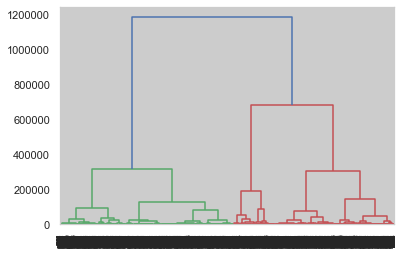

In [96]:
dendrogram = sch.dendrogram(sch.linkage(cv, method='ward'))

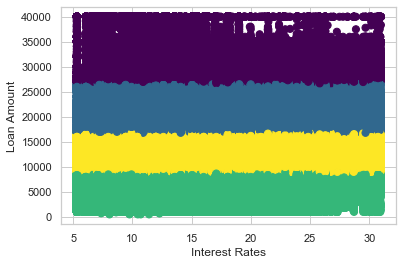

In [97]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)

plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');
plt.xlabel("Interest Rates")
plt.ylabel("Loan Amount")
plt.show()

#int rate on x axis and loan amount on y axis

In [98]:
labels

array([0, 0, 1, ..., 1, 3, 3])

In [99]:
labeldf=pd.DataFrame(labels[0:1303607], columns = ["Cluster"])

In [100]:
labeldf.head()

Cluster
0        0
1        0
2        1
3        2
4        2

In [101]:
labeldf['Cluster'] = labeldf["Cluster"].replace(to_replace =[0,1,2,3], value =[1,2,3,4])

In [102]:
labeldf.head()

Cluster
0        1
1        1
2        2
3        3
4        3

In [103]:
labeldf.count()

Cluster    1303607
dtype: int64

In [104]:
dfcluster["Cluster"] = labeldf["Cluster"]

In [105]:
dfcluster.head()

delinq_2yrs   dti  inq_last_6mths  installment  int_rate  loan_amnt  \
0         0.00 30.46            0.00      1151.16     22.35      30000   
1         0.00   nan            0.00       975.71     16.14      40000   
2         0.00 18.92            0.00       622.68      7.56      20000   
3         0.00  4.64            0.00       147.99     11.31       4500   
4         0.00 12.37            0.00       345.18     27.27       8425   

   loan_status  num_tl_90g_dpd_24m  pub_rec  log_annual_inc  log_avg_cur_bal  \
0            1                0.00     1.00            5.00             4.63   
1            1                0.00     0.00            4.65             4.18   
2            1                0.00     0.00            5.00             4.76   
3            1                0.00     0.00            4.59             3.39   
4            1                0.00     0.00            5.65             4.54   

   emp_length_5-9 years  emp_length_>10 years  grade_2  grade_3  grade_4  \
0                     1                     0        0        0        1   
1                     0                     0        0        0        0   
2                     0                     1        0        0        0   
3                     0                     1        0        0        0   
4                     0                     0        0        1        0   

   grade_5  grade_6  grade_7  home_ownership_OTHER  home_ownership_OWN  \
0        0        0        0                     0                   0   
1        1        0        0                     0                   0   
2        0        0        1                     0                   0   
3        0        1        0                     0                   0   
4        0        0        0                     0                   0   

   home_ownership_RENT  purpose_debt_consolidation  purpose_other  \
0                    0                           1              0   
1                    0                           0              0   
2                    0                           0              0   
3                    1                           0              0   
4                    0                           0              0   

   purpose_personal  term_ 60 months  Cluster  
0                 0                0        1  
1                 0                1        1  
2                 0                0        2  
3                 0                0        3  
4                 0                0        3

### 6.1 Cluster 1

In [106]:
cluster1=dfcluster[dfcluster["Cluster"]==1]
cluster1.head()

delinq_2yrs   dti  inq_last_6mths  installment  int_rate  loan_amnt  \
0          0.00 30.46            0.00      1151.16     22.35      30000   
1          0.00   nan            0.00       975.71     16.14      40000   
18         0.00 23.65            0.00       941.87     10.33      29050   
25         0.00 10.74            0.00       970.91     15.02      28000   
37          nan  7.51            0.00       895.71      7.02      29000   

    loan_status  num_tl_90g_dpd_24m  pub_rec  log_annual_inc  log_avg_cur_bal  \
0             1                0.00     1.00            5.00             4.63   
1             1                0.00     0.00            4.65             4.18   
18            1                0.00     0.00            4.83             4.13   
25            1                0.00     0.00            4.76             2.85   
37            1                 nan     0.00            5.11             4.53   

    emp_length_5-9 years  emp_length_>10 years  grade_2  grade_3  grade_4  \
0                      1                     0        0        0        1   
1                      0                     0        0        0        0   
18                     0                     0        0        0        0   
25                     0                     0        0        0        0   
37                     0                     0        0        0        0   

    grade_5  grade_6  grade_7  home_ownership_OTHER  home_ownership_OWN  \
0         0        0        0                     0                   0   
1         1        0        0                     0                   0   
18        0        1        0                     0                   0   
25        1        0        0                     0                   0   
37        0        0        1                     0                   0   

    home_ownership_RENT  purpose_debt_consolidation  purpose_other  \
0                     0                           1              0   
1                     0                           0              0   
18                    0                           0              0   
25                    1                           1              0   
37                    1                           1              0   

    purpose_personal  term_ 60 months  Cluster  
0                  0                0        1  
1                  0                1        1  
18                 1                0        1  
25                 0                0        1  
37                 0                0        1

In [107]:
cluster1.describe()

delinq_2yrs       dti  inq_last_6mths  installment  int_rate  \
count    141115.00 140240.00       142071.00    142072.00 142072.00   
mean          0.28     17.86            0.65       952.64     14.94   
std           0.66      7.92            0.96       188.59      5.37   
min           0.00      0.00            0.00       244.73      5.31   
25%           0.00     12.03            0.00       813.10     10.99   
50%           0.00     17.53            0.00       938.57     14.46   
75%           0.00     23.44            1.00      1099.53     18.25   
max           4.00     38.37            8.00      1719.83     30.99   

       loan_amnt  loan_status  num_tl_90g_dpd_24m   pub_rec  log_annual_inc  \
count  142072.00    142072.00           137793.00 140981.00       142072.00   
mean    32137.60         0.76                0.05      0.11            5.05   
std      3357.81         0.43                0.26      0.35            0.23   
min     26650.00         0.00                0.00      0.00            0.00   
25%     29900.00         1.00                0.00      0.00            4.92   
50%     32000.00         1.00                0.00      0.00            5.02   
75%     35000.00         1.00                0.00      0.00            5.16   
max     40000.00         1.00                2.00      2.00            6.98   

       log_avg_cur_bal  emp_length_5-9 years  emp_length_>10 years   grade_2  \
count        138382.00             142072.00             142072.00 142072.00   
mean              4.15                  0.23                  0.41      0.05   
std               0.45                  0.42                  0.49      0.22   
min               0.00                  0.00                  0.00      0.00   
25%               3.83                  0.00                  0.00      0.00   
50%               4.21                  0.00                  0.00      0.00   
75%               4.47                  0.00                  1.00      0.00   
max               5.90                  1.00                  1.00      1.00   

        grade_3   grade_4   grade_5   grade_6   grade_7  home_ownership_OTHER  \
count 142072.00 142072.00 142072.00 142072.00 142072.00             142072.00   
mean       0.13      0.19      0.28      0.20      0.13                  0.00   
std        0.33      0.39      0.45      0.40      0.33                  0.02   
min        0.00      0.00      0.00      0.00      0.00                  0.00   
25%        0.00      0.00      0.00      0.00      0.00                  0.00   
50%        0.00      0.00      0.00      0.00      0.00                  0.00   
75%        0.00      0.00      1.00      0.00      0.00                  0.00   
max        1.00      1.00      1.00      1.00      1.00                  1.00   

       home_ownership_OWN  home_ownership_RENT  purpose_debt_consolidation  \
count           142072.00            142072.00                   142072.00   
mean                 0.10                 0.25                        0.63   
std                  0.30                 0.43                        0.48   
min                  0.00                 0.00                        0.00   
25%                  0.00                 0.00                        0.00   
50%                  0.00                 0.00                        1.00   
75%                  0.00                 0.00                        1.00   
max                  1.00                 1.00                        1.00   

       purpose_other  purpose_personal  term_ 60 months   Cluster  
count      142072.00         142072.00        142072.00 142072.00  
mean            0.03              0.13             0.47      1.00  
std             0.16              0.33             0.50      0.00  
min             0.00              0.00             0.00      1.00  
25%             0.00              0.00             0.00      1.00  
50%             0.00              0.00             0.00      1.00  
75%             0.00     

### 6.2 Cluster 2

In [108]:
cluster2=dfcluster[dfcluster["Cluster"]==2]
cluster2.head()

delinq_2yrs   dti  inq_last_6mths  installment  int_rate  loan_amnt  \
2          0.00 18.92            0.00       622.68      7.56      20000   
5          0.00 22.18            0.00       507.55     17.97      20000   
16         0.00 22.66            0.00       602.49     26.31      20000   
34         0.00 23.98            0.00       531.45     11.80      24000   
35         0.00 11.77            0.00       820.42     18.94      22400   

    loan_status  num_tl_90g_dpd_24m  pub_rec  log_annual_inc  log_avg_cur_bal  \
2             1                0.00     0.00            5.00             4.76   
5             1                0.00     0.00            4.76             3.52   
16            1                0.00     0.00            4.76             4.67   
34            1                0.00     1.00            4.76             3.34   
35            1                0.00     0.00            4.83             4.13   

    emp_length_5-9 years  emp_length_>10 years  grade_2  grade_3  grade_4  \
2                      0                     1        0        0        0   
5                      0                     0        0        0        1   
16                     0                     0        0        1        0   
34                     0                     1        0        0        0   
35                     0                     1        0        0        1   

    grade_5  grade_6  grade_7  home_ownership_OTHER  home_ownership_OWN  \
2         0        0        1                     0                   0   
5         0        0        0                     0                   0   
16        0        0        0                     0                   0   
34        0        1        0                     0                   0   
35        0        0        0                     0                   0   

    home_ownership_RENT  purpose_debt_consolidation  purpose_other  \
2                     0                           0              0   
5                     1                           1              0   
16                    0                           0              0   
34                    1                           0              0   
35                    0                           0              0   

    purpose_personal  term_ 60 months  Cluster  
2                  0                0        2  
5                  0                1        2  
16                 0                1        2  
34                 1                1        2  
35                 1                0        2

In [109]:
cluster2.describe()

delinq_2yrs       dti  inq_last_6mths  installment  int_rate  \
count    289999.00 288856.00       291850.00    291850.00 291850.00   
mean          0.27     18.46            0.63       621.39     13.69   
std           0.65      7.97            0.93       123.46      5.11   
min           0.00     -1.00            0.00        39.66      5.31   
25%           0.00     12.52            0.00       533.75      9.76   
50%           0.00     18.08            0.00       618.64     13.18   
75%           0.00     24.18            1.00       697.41     16.99   
max           4.00     38.37            8.00      1142.56     30.99   

       loan_amnt  loan_status  num_tl_90g_dpd_24m   pub_rec  log_annual_inc  \
count  291850.00    291850.00           278435.00 289607.00       291850.00   
mean    21126.23         0.77                0.06      0.14            4.90   
std      2658.58         0.42                0.26      0.39            0.20   
min     16775.00         0.00                0.00      0.00            0.00   
25%     19200.00         1.00                0.00      0.00            4.78   
50%     20000.00         1.00                0.00      0.00            4.89   
75%     24000.00         1.00                0.00      0.00            5.01   
max     26625.00         1.00                2.00      2.00            6.98   

       log_avg_cur_bal  emp_length_5-9 years  emp_length_>10 years   grade_2  \
count        279652.00             291850.00             291850.00 291850.00   
mean              3.99                  0.24                  0.38      0.03   
std               0.46                  0.43                  0.48      0.18   
min               0.00                  0.00                  0.00      0.00   
25%               3.63                  0.00                  0.00      0.00   
50%               4.03                  0.00                  0.00      0.00   
75%               4.34                  0.00                  1.00      0.00   
max               5.67                  1.00                  1.00      1.00   

        grade_3   grade_4   grade_5   grade_6   grade_7  home_ownership_OTHER  \
count 291850.00 291850.00 291850.00 291850.00 291850.00             291850.00   
mean       0.09      0.16      0.27      0.26      0.18                  0.00   
std        0.29      0.36      0.44      0.44      0.38                  0.01   
min        0.00      0.00      0.00      0.00      0.00                  0.00   
25%        0.00      0.00      0.00      0.00      0.00                  0.00   
50%        0.00      0.00      0.00      0.00      0.00                  0.00   
75%        0.00      0.00      1.00      1.00      0.00                  0.00   
max        1.00      1.00      1.00      1.00      1.00                  1.00   

       home_ownership_OWN  home_ownership_RENT  purpose_debt_consolidation  \
count           291850.00            291850.00                   291850.00   
mean                 0.10                 0.32                        0.64   
std                  0.30                 0.47                        0.48   
min                  0.00                 0.00                        0.00   
25%                  0.00                 0.00                        0.00   
50%                  0.00                 0.00                        1.00   
75%                  0.00                 1.00                        1.00   
max                  1.00                 1.00                        1.00   

       purpose_other  purpose_personal  term_ 60 months   Cluster  
count      291850.00         291850.00        291850.00 291850.00  
mean            0.03              0.10             0.43      2.00  
std             0.17              0.30             0.49      0.00  
min             0.00              0.00             0.00      2.00  
25%             0.00              0.00             0.00      2.00  
50%             0.00              0.00             0.00      2.00  
75%             0.00     

### 6.3 Cluster 3

In [110]:
cluster3=dfcluster[dfcluster["Cluster"]==3]
cluster3.head()

delinq_2yrs   dti  inq_last_6mths  installment  int_rate  loan_amnt  \
3         0.00  4.64            0.00       147.99     11.31       4500   
4         0.00 12.37            0.00       345.18     27.27       8425   
6         0.00 16.21            0.00       217.05     11.31       6600   
7         0.00 15.09            0.00        84.92     13.56       2500   
8         0.00 19.10            1.00       144.55     17.97       4000   

   loan_status  num_tl_90g_dpd_24m  pub_rec  log_annual_inc  log_avg_cur_bal  \
3            1                0.00     0.00            4.59             3.39   
4            1                0.00     0.00            5.65             4.54   
6            1                0.00     0.00            4.65             3.65   
7            1                0.00     0.00            4.62             3.79   
8            1                0.00     0.00            4.78             3.99   

   emp_length_5-9 years  emp_length_>10 years  grade_2  grade_3  grade_4  \
3                     0                     1        0        0        0   
4                     0                     0        0        1        0   
6                     0                     1        0        0        0   
7                     1                     0        0        0        0   
8                     1                     0        0        0        1   

   grade_5  grade_6  grade_7  home_ownership_OTHER  home_ownership_OWN  \
3        0        1        0                     0                   0   
4        0        0        0                     0                   0   
6        0        1        0                     0                   0   
7        1        0        0                     0                   0   
8        0        0        0                     0                   0   

   home_ownership_RENT  purpose_debt_consolidation  purpose_other  \
3                    1                           0              0   
4                    0                           0              0   
6                    1                           0              0   
7                    1                           0              1   
8                    0                           0              0   

   purpose_personal  term_ 60 months  Cluster  
3                 0                0        3  
4                 0                0        3  
6                 0                0        3  
7                 0                0        3  
8                 1                0        3

In [111]:
cluster3.describe()

delinq_2yrs       dti  inq_last_6mths  installment  int_rate  \
count    392082.00 391832.00       395613.00    395613.00 395613.00   
mean          0.27     17.37            0.68       184.33     12.61   
std           0.66      8.50            0.95        67.47      4.16   
min           0.00      0.00            0.00        14.01      5.31   
25%           0.00     10.89            0.00       136.70      9.49   
50%           0.00     16.90            0.00       187.75     12.29   
75%           0.00     23.48            1.00       240.30     14.99   
max           4.00     38.37            8.00       382.56     30.99   

       loan_amnt  loan_status  num_tl_90g_dpd_24m   pub_rec  log_annual_inc  \
count  395613.00    395613.00           365016.00 391224.00       395613.00   
mean     5526.93         0.84                0.07      0.22            4.69   
std      2000.99         0.37                0.28      0.46            0.24   
min       500.00         0.00                0.00      0.00            0.00   
25%      4000.00         1.00                0.00      0.00            4.54   
50%      5875.00         1.00                0.00      0.00            4.70   
75%      7200.00         1.00                0.00      0.00            4.85   
max      8950.00         1.00                2.00      2.00            7.04   

       log_avg_cur_bal  emp_length_5-9 years  emp_length_>10 years   grade_2  \
count        367930.00             395613.00             395613.00 395613.00   
mean              3.71                  0.23                  0.28      0.01   
std               0.54                  0.42                  0.45      0.10   
min               0.00                  0.00                  0.00      0.00   
25%               3.34                  0.00                  0.00      0.00   
50%               3.67                  0.00                  0.00      0.00   
75%               4.14                  0.00                  1.00      0.00   
max               5.67                  1.00                  1.00      1.00   

        grade_3   grade_4   grade_5   grade_6   grade_7  home_ownership_OTHER  \
count 395613.00 395613.00 395613.00 395613.00 395613.00             395613.00   
mean       0.04      0.14      0.30      0.33      0.18                  0.00   
std        0.20      0.35      0.46      0.47      0.38                  0.02   
min        0.00      0.00      0.00      0.00      0.00                  0.00   
25%        0.00      0.00      0.00      0.00      0.00                  0.00   
50%        0.00      0.00      0.00      0.00      0.00                  0.00   
75%        0.00      0.00      1.00      1.00      0.00                  0.00   
max        1.00      1.00      1.00      1.00      1.00                  1.00   

       home_ownership_OWN  home_ownership_RENT  purpose_debt_consolidation  \
count           395613.00            395613.00                   395613.00   
mean                 0.12                 0.49                        0.49   
std                  0.32                 0.50                        0.50   
min                  0.00                 0.00                        0.00   
25%                  0.00                 0.00                        0.00   
50%                  0.00                 0.00                        0.00   
75%                  0.00                 1.00                        1.00   
max                  1.00                 1.00                        1.00   

       purpose_other  purpose_personal  term_ 60 months   Cluster  
count      395613.00         395613.00        395613.00 395613.00  
mean            0.11              0.21             0.01      3.00  
std             0.31              0.41             0.10      0.00  
min             0.00              0.00             0.00      3.00  
25%             0.00              0.00             0.00      3.00  
50%             0.00              0.00             0.00      3.00  
75%             0.00     

### 6.4 Cluster 4

In [112]:
cluster4=dfcluster[dfcluster["Cluster"]==4]
cluster4.head()

delinq_2yrs   dti  inq_last_6mths  installment  int_rate  loan_amnt  \
11         0.00  2.62            0.00       467.01      7.56      15000   
14         0.00 19.88            1.00       403.19      7.56      12950   
15         0.00 21.17            1.00       237.67     12.98      10450   
17         1.00 12.25            1.00       227.43     12.98      10000   
21         1.00 10.60            1.00       331.19     11.80      10000   

    loan_status  num_tl_90g_dpd_24m  pub_rec  log_annual_inc  log_avg_cur_bal  \
11            1                0.00     0.00            5.30             4.40   
14            1                0.00     0.00            4.74             4.19   
15            1                0.00     0.00            4.76             3.99   
17            1                0.00     0.00            4.78             3.84   
21            1                1.00     0.00            5.00             3.42   

    emp_length_5-9 years  emp_length_>10 years  grade_2  grade_3  grade_4  \
11                     0                     1        0        0        0   
14                     0                     1        0        0        0   
15                     0                     1        0        0        0   
17                     0                     0        0        0        0   
21                     0                     0        0        0        0   

    grade_5  grade_6  grade_7  home_ownership_OTHER  home_ownership_OWN  \
11        0        0        1                     0                   0   
14        0        0        1                     0                   0   
15        0        1        0                     0                   0   
17        0        1        0                     0                   0   
21        0        1        0                     0                   0   

    home_ownership_RENT  purpose_debt_consolidation  purpose_other  \
11                    0                           0              0   
14                    0                           1              0   
15                    0                           0              0   
17                    0                           0              0   
21                    1                           1              0   

    purpose_personal  term_ 60 months  Cluster  
11                 1                0        4  
14                 0                0        4  
15                 0                1        4  
17                 1                1        4  
21                 0                0        4

In [113]:
cluster4.describe()

delinq_2yrs       dti  inq_last_6mths  installment  int_rate  \
count    470684.00 469368.00       474072.00    474072.00 474072.00   
mean          0.27     18.04            0.66       382.79     13.03   
std           0.65      8.19            0.93        82.11      4.67   
min           0.00     -1.00            0.00         4.93      5.31   
25%           0.00     11.83            0.00       321.74      9.49   
50%           0.00     17.58            0.00       367.74     12.69   
75%           0.00     23.94            1.00       446.31     15.61   
max           4.00     38.37            8.00       718.65     30.99   

       loan_amnt  loan_status  num_tl_90g_dpd_24m   pub_rec  log_annual_inc  \
count  474072.00    474072.00           447523.00 469547.00       474072.00   
mean    12394.28         0.80                0.06      0.19            4.79   
std      2275.18         0.40                0.27      0.44            0.21   
min      8975.00         0.00                0.00      0.00            0.00   
25%     10000.00         1.00                0.00      0.00            4.65   
50%     12000.00         1.00                0.00      0.00            4.78   
75%     15000.00         1.00                0.00      0.00            4.91   
max     16750.00         1.00                2.00      2.00            6.96   

       log_avg_cur_bal  emp_length_5-9 years  emp_length_>10 years   grade_2  \
count        450095.00             474072.00             474072.00 474072.00   
mean              3.83                  0.24                  0.32      0.02   
std               0.49                  0.43                  0.47      0.14   
min               0.00                  0.00                  0.00      0.00   
25%               3.46                  0.00                  0.00      0.00   
50%               3.81                  0.00                  0.00      0.00   
75%               4.22                  0.00                  1.00      0.00   
max               5.98                  1.00                  1.00      1.00   

        grade_3   grade_4   grade_5   grade_6   grade_7  home_ownership_OTHER  \
count 474072.00 474072.00 474072.00 474072.00 474072.00             474072.00   
mean       0.06      0.14      0.28      0.30      0.18                  0.00   
std        0.24      0.35      0.45      0.46      0.39                  0.02   
min        0.00      0.00      0.00      0.00      0.00                  0.00   
25%        0.00      0.00      0.00      0.00      0.00                  0.00   
50%        0.00      0.00      0.00      0.00      0.00                  0.00   
75%        0.00      0.00      1.00      1.00      0.00                  0.00   
max        1.00      1.00      1.00      1.00      1.00                  1.00   

       home_ownership_OWN  home_ownership_RENT  purpose_debt_consolidation  \
count           474072.00            474072.00                   474072.00   
mean                 0.11                 0.41                        0.61   
std                  0.31                 0.49                        0.49   
min                  0.00                 0.00                        0.00   
25%                  0.00                 0.00                        0.00   
50%                  0.00                 0.00                        1.00   
75%                  0.00                 1.00                        1.00   
max                  1.00                 1.00                        1.00   

       purpose_other  purpose_personal  term_ 60 months   Cluster  
count      474072.00         474072.00        474072.00 474072.00  
mean            0.04              0.12             0.25      4.00  
std             0.20              0.32             0.43      0.00  
min             0.00              0.00             0.00      4.00  
25%             0.00              0.00             0.00      4.00  
50%             0.00              0.00             0.00      4.00  
75%             0.00     

### 6.5 Cluster EDA

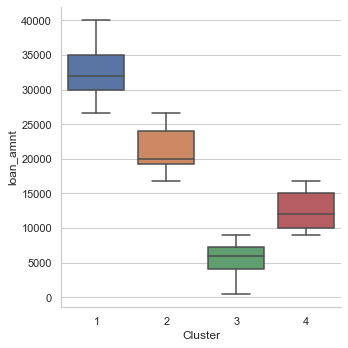

In [114]:
sns.catplot(x="Cluster", y="loan_amnt", kind = "box", data=dfcluster)

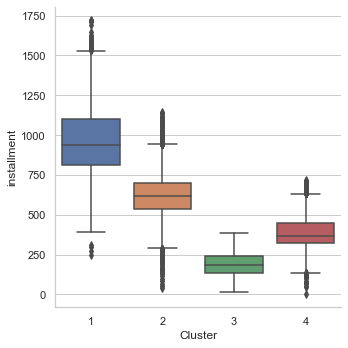

In [115]:
sns.catplot(x="Cluster", y="installment", kind = "box", data=dfcluster)

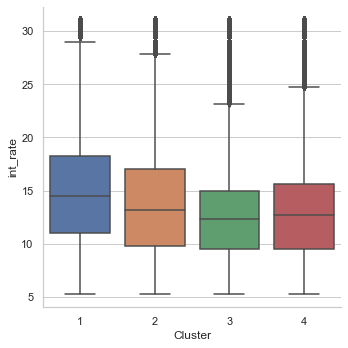

In [116]:
sns.catplot(x="Cluster", y="int_rate", kind = "box", data=dfcluster)

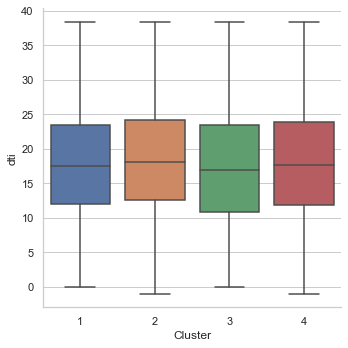

In [117]:
sns.catplot(x="Cluster", y="dti", kind = "box", data=dfcluster)

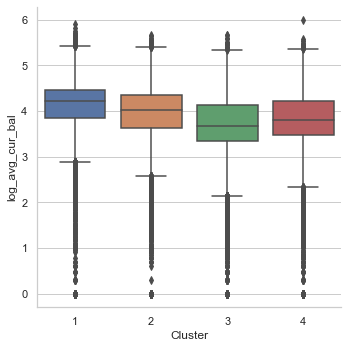

In [118]:
sns.catplot(x="Cluster", y="log_avg_cur_bal", kind = "box", data=dfcluster)

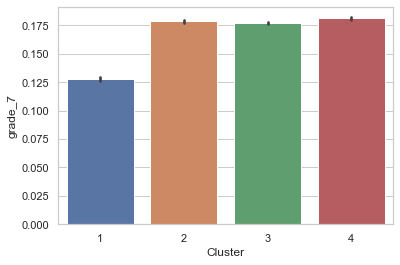

In [119]:
sns.barplot(x="Cluster", y="grade_7",data=dfcluster)

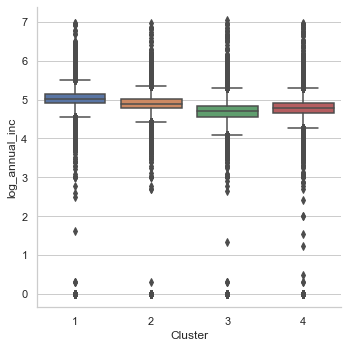

In [120]:
sns.catplot(x="Cluster", y="log_annual_inc", kind = "box", data=dfcluster)

Fraction of fully paid loans for each cluster:

In [121]:
!pip install plotly

/bin/sh: pip: command not found


In [122]:
import plotly as py

In [123]:
import plotly.express as px
fig = px.treemap(dfcluster, path=['Cluster', 'loan_status'])

In [124]:
# Cluster 1
loan_status_c1 = cluster1.loc[(cluster1['loan_status']==1)] 
x1=np.sum(loan_status_c1['loan_status'])
loan_status_c1 = cluster1.loc[(cluster1['loan_status']==0)] 
y1=np.count_nonzero(loan_status_c1['loan_status']==0)
fully_paid_c1 = x1/(x1+y1)

# Cluster 2
loan_status_c2 = cluster2.loc[(cluster2['loan_status']==1)] 
x2=np.sum(loan_status_c2['loan_status'])
loan_status_c2 = cluster2.loc[(cluster2['loan_status']==0)] 
y2=np.count_nonzero(loan_status_c2['loan_status']==0)
fully_paid_c2 = x2/(x2+y2)

# Cluster 3
loan_status_c3 = cluster3.loc[(cluster3['loan_status']==1)] 
x3=np.sum(loan_status_c3['loan_status'])
loan_status_c3 = cluster3.loc[(cluster3['loan_status']==0)] 
y3=np.count_nonzero(loan_status_c3['loan_status']==0)
fully_paid_c3 = x3/(x3+y3)

# Cluster 4
loan_status_c4 = cluster4.loc[(cluster4['loan_status']==1)] 
x4=np.sum(loan_status_c4['loan_status'])
loan_status_c4 = cluster4.loc[(cluster4['loan_status']==0)] 
y4=np.count_nonzero(loan_status_c4['loan_status']==0)
fully_paid_c4 = x4/(x4+y4)

In [125]:
data = {'Cluster':  ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'],
        'Fraction of Fully Paid Loans': [fully_paid_c1, fully_paid_c2, fully_paid_c3, fully_paid_c4]}

cluster_fraction = pd.DataFrame (data, columns = ['Cluster','Fraction of Fully Paid Loans'])

cluster_fraction

Cluster  Fraction of Fully Paid Loans
0  Cluster 1                          0.76
1  Cluster 2                          0.77
2  Cluster 3                          0.84
3  Cluster 4                          0.80

In [126]:
x= np.array([['1',fully_paid_c1,'Fully Paid'],
             ['1',1-fully_paid_c1,'Charged Off'],
             ['2',fully_paid_c2,'Fully Paid'],
             ['2',1-fully_paid_c2,'Charged Off'],
             ['3',fully_paid_c3,'Fully Paid'],
             ['3',1-fully_paid_c3,'Charged Off'],
             ['4',fully_paid_c4,'Fully Paid'],
             ['4',1-fully_paid_c4,'Charged Off']])

In [127]:
y=pd.DataFrame(data = x, columns = ['Cluster','Percentage','Loan Status'])

In [128]:
import plotly.express as px
fig = px.bar(y, x="Cluster", y="Percentage", color='Loan Status')
fig.update_layout(title_text='Loan Status Percentile by Cluster')
fig.show()

## 7. Correlation Analysis<a id = "cor"></a>

We will be performing a generic correlation analysis to check if any features are highly correlated with one another:

In [129]:
df6.corr()

delinq_2yrs   dti  inq_last_6mths  installment  \
delinq_2yrs                        1.00 -0.01            0.02         0.01   
dti                               -0.01  1.00           -0.00         0.03   
inq_last_6mths                     0.02 -0.00            1.00         0.01   
installment                        0.01  0.03            0.01         1.00   
int_rate                           0.05  0.17            0.22         0.16   
loan_amnt                          0.00  0.03           -0.02         0.95   
loan_status                       -0.02 -0.11           -0.07        -0.05   
num_tl_90g_dpd_24m                 0.49 -0.02            0.03        -0.01   
pub_rec                           -0.03 -0.04            0.07        -0.07   
log_annual_inc                     0.07 -0.21            0.05         0.45   
log_avg_cur_bal                    0.06  0.06           -0.02         0.25   
emp_length_5-9 years              -0.02 -0.00            0.01         0.00   
emp_length_>10 years               0.04  0.02           -0.00         0.08   
grade_2                            0.01  0.05            0.08         0.09   
grade_3                            0.01  0.07            0.09         0.10   
grade_4                            0.02  0.09            0.09         0.05   
grade_5                            0.03  0.05            0.03        -0.03   
grade_6                            0.00 -0.06           -0.08        -0.08   
grade_7                           -0.07 -0.14           -0.13        -0.03   
home_ownership_OTHER              -0.00 -0.00           -0.00        -0.00   
home_ownership_OWN                 0.00  0.02            0.00        -0.02   
home_ownership_RENT               -0.06 -0.01           -0.03        -0.14   
purpose_debt_consolidation         0.01  0.09           -0.01         0.11   
purpose_other                      0.00 -0.04            0.00        -0.12   
purpose_personal                   0.01 -0.12            0.04        -0.09   
term_ 60 months                   -0.01  0.07            0.02         0.14   

                            int_rate  loan_amnt  loan_status  \
delinq_2yrs                     0.05       0.00        -0.02   
dti                             0.17       0.03        -0.11   
inq_last_6mths                  0.22      -0.02        -0.07   
installment                     0.16       0.95        -0.05   
int_rate                        1.00       0.14        -0.26   
loan_amnt                       0.14       1.00        -0.07   
loan_status                    -0.26      -0.07         1.00   
num_tl_90g_dpd_24m              0.03      -0.02        -0.01   
pub_rec                         0.06      -0.09        -0.03   
log_annual_inc                 -0.11       0.47         0.06   
log_avg_cur_bal                -0.08       0.28         0.08   
emp_length_5-9 years            0.01       0.00         0.00   
emp_length_>10 years           -0.01       0.10         0.02   
grade_2                         0.38       0.08        -0.10   
grade_3                         0.45       0.10        -0.13   
grade_4                         0.39       0.04        -0.11   
grade_5                         0.10      -0.02        -0.04   
grade_6                        -0.35      -0.09         0.11   
grade_7                        -0.59      -0.03         0.16   
home_ownership_OTHER            0.00      -0.00         0.00   
home_ownership_OWN              0.00      -0.02        -0.01   
home_ownership_RENT             0.07      -0.17        -0.07   
purpose_debt_consolidation      0.09       0.11        -0.03   
purpose_other                   0.07      -0.13        -0.01   
purpose_personal                0.01      -0.10         0.01   
term_ 60 months                 0.42       0.38        -0.18   

                            num_tl_90g_dpd_24m  pub_rec  log_annual_inc  \
delinq_2yrs                               0.49    -0.03            0.07   
dti                                      -

                            delinq_2yrs   dti  inq_last_6mths  installment  \
delinq_2yrs                        1.00 -0.01            0.02         0.01   
dti                               -0.01  1.00           -0.00         0.03   
inq_last_6mths                     0.02 -0.00            1.00         0.01   
installment                        0.01  0.03            0.01         1.00   
int_rate                           0.05  0.17            0.22         0.16   
loan_amnt                          0.00  0.03           -0.02         0.95   
loan_status                       -0.02 -0.11           -0.07        -0.05   
num_tl_90g_dpd_24m                 0.49 -0.02            0.03        -0.01   
pub_rec                           -0.03 -0.04            0.07        -0.07   
log_annual_inc                     0.07 -0.21            0.05         0.45   
log_avg_cur_bal                    0.06  0.06           -0.02         0.25   
emp_length_5-9 years              -0.02 -0.00            0.01   

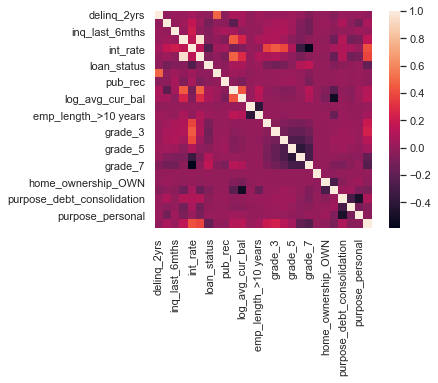

In [130]:
corrmat = df6.corr()
print(corrmat)
sns.heatmap(corrmat, square=True)

The correlation analysis does not seem to suggest strong collinearity (>0.8) between the input variables, with the exception of the pairwise correlation between 'int_rate' and 'grade'. A higher grade has a negative correlation with the interest rate offered, which confirms the business model that we have researched. Both input variables will be retained due to their relationship with the other variables.

## 8. Data Partition<a id = "part"></a>

We will be partitioning the data into 70% train set and 30% test set. We will be using the training set to predict the the probability of future loans being charged off.

Train and test sets:

In [131]:
X = df6.loc[:, df6.columns != "loan_status"]
y = df6.loc[:, df6.columns == "loan_status"]
X_train = X.sample(frac=0.7, random_state=0)
X_test = X.drop(X_train.index)
y_train = y.sample(frac=0.7, random_state=0)
y_test = y.drop(X_train.index)

## 9. Modelling<a id = "mod"></a>

We will be building the following 3 models:
1. Logistic Regression
+ K-Nearest Neighbour
+ Random Forest

For each model, we will be using the training set and evaluating the models using a cross-validated AUROC score.

In [132]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

### 9.1 Logistic Regression

In [133]:
from sklearn.linear_model import SGDClassifier

Machine learning pipeline with <ins>mean imputation of missing values</ins> and <ins>data standardization</ins>:

In [134]:
pipeline_logreg = Pipeline([
    ('imputer', SimpleImputer(copy=False)),
    ('scaler', StandardScaler(copy=False)),
    ('model', SGDClassifier(loss='log', max_iter=1000, tol=1e-3, random_state=1, warm_start=True))
])

Hyperparameter tuning:

In [135]:
## Create a small grid of hyperparameters
param_grid_logreg = {'model__alpha': [10**-5, 10**-2, 10**1],
                     'model__penalty': ['l1', 'l2']}

## Create a search grid object
grid_logreg = GridSearchCV(estimator=pipeline_logreg, param_grid=param_grid_logreg, 
                           scoring='roc_auc', n_jobs=-1, pre_dispatch='2*n_jobs', 
                           cv=5, verbose=1, return_train_score=False)

## Conduct grid search and train the model
grid_logreg.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   54.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('imputer',
                                        SimpleImputer(add_indicator=False,
                                                      copy=False,
                                                      fill_value=None,
                                                      missing_values=nan,
                                                      strategy='mean',
                                                      verbose=0)),
                                       ('scaler',
                                        StandardScaler(copy=False,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SGDClassifier(alpha=0.0001,
                                                      average=False

Cross validated mean AUROC score of the best model:

In [136]:
grid_logreg.best_score_

0.7061762544278503

Best hyperparameters:

In [137]:
grid_logreg.best_params_

{'model__alpha': 0.01, 'model__penalty': 'l2'}

### 9.2 K-NN

In [138]:
from sklearn.neighbors import KNeighborsClassifier

Machine learning pipeline with <ins>mean imputation of missing values</ins>, <ins>data standardization</ins> and <ins>dimension reduction</ins>:

In [139]:
pipeline_knn = Pipeline([
    ('imputer', SimpleImputer(copy=False)),
    ('scaler', StandardScaler(copy=False)),
    ('lda', LinearDiscriminantAnalysis()),
    ('model', KNeighborsClassifier(n_jobs=-1))])

Hyperparameter tuning:

In [140]:
## Create a small grid of hyperparameters
param_grid_knn = {'lda__n_components': [3, 9],
                  'model__n_neighbors': [5, 25, 125]}

## Create a search grid object
grid_knn = GridSearchCV(estimator=pipeline_knn, param_grid=param_grid_knn,
                        scoring='roc_auc', n_jobs=-1, pre_dispatch='2*n_jobs', 
                        cv=5, verbose=1, return_train_score=False)


## Conduct grid search and train the model
grid_knn.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.5min finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning:

n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(25, 2 - 1) = 1 components.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning:

In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).



GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('imputer',
                                        SimpleImputer(add_indicator=False,
                                                      copy=False,
                                                      fill_value=None,
                                                      missing_values=nan,
                                                      strategy='mean',
                                                      verbose=0)),
                                       ('scaler',
                                        StandardScaler(copy=False,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('lda',
                                        LinearDiscriminantAnalysis(n_components=None,
                                                   

Cross validated mean AUROC score of the best model:

In [141]:
grid_knn.best_score_

0.6970472006416936

Best hyperparameters:

In [142]:
grid_knn.best_params_

{'lda__n_components': 3, 'model__n_neighbors': 125}

### 9.3 Random Forest

In [143]:
from sklearn.ensemble import RandomForestClassifier

Machine learning pipeline with <ins>mean imputation of missing values</ins>:

In [144]:
pipeline_rf = Pipeline([('imputer', SimpleImputer(copy=False)),
                        ('model', RandomForestClassifier(n_jobs=-1, random_state=1))])

Hyperparameter tuning:

In [145]:
## Create a small grid of hyperparameters
param_grid_rf = {'model__n_estimators': [50]}

## Create a search grid object
grid_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, 
                        scoring='roc_auc', n_jobs=-1, pre_dispatch='2*n_jobs', 
                        cv=5, verbose=1, return_train_score=False)

## Conduct grid search and train the model
grid_rf.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.9min remaining:  5.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('imputer',
                                        SimpleImputer(add_indicator=False,
                                                      copy=False,
                                                      fill_value=None,
                                                      missing_values=nan,
                                                      strategy='mean',
                                                      verbose=0)),
                                       ('model',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=No

Cross validated mean AUROC score of the best model:

In [146]:
grid_rf.best_score_

0.683719684955262

Best hyperparameters:

In [147]:
grid_rf.best_params_

{'model__n_estimators': 50}

### 9.4 Model Comparison

In [148]:
data = {'Model':  ['Logistic Regression', 'K-NN', 'Random Forest'],
        'Cross-validated mean AUROC scores': [grid_logreg.best_score_, grid_rf.best_score_, grid_knn.best_score_]}

model_comparison = pd.DataFrame (data, columns = ['Model','Cross-validated mean AUROC scores'])

model_comparison

Model  Cross-validated mean AUROC scores
0  Logistic Regression                               0.71
1                 K-NN                               0.68
2        Random Forest                               0.70

The three models performed quite similarly according to the AUROC:

In [149]:
print('Cross-validated AUROC scores')
print(grid_logreg.best_score_, '- Logistic regression')
print(grid_rf.best_score_, '- Random forest')
print(grid_knn.best_score_, '- k-nearest neighbors')

Cross-validated AUROC scores
0.7061762544278503 - Logistic regression
0.683719684955262 - Random forest
0.6970472006416936 - k-nearest neighbors


<ins>Logistic regression</ins> has been identified to have the highest AUROC score even though the AUROC scores of three models are very close. This will be our selected model for further evaluation.

## 10. Evaluation of Chosen Model<a id = "eva"></a>

### 10.1 Test Set Evaluation

Cross validated mean AUROC score of the best model using test data:

In [150]:
from sklearn.metrics import roc_auc_score

In [151]:
y_score = grid_logreg.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_score)

0.706818692546995

In [152]:
data_1 = {'Data set':  ['Train set', 'Test set'],
          'Cross-validated mean AUROC scores': [grid_logreg.best_score_, roc_auc_score(y_test, y_score)]}

data_set = pd.DataFrame (data_1, columns = ['Data set','Cross-validated mean AUROC scores'])

## Set pandas option
pd.options.display.float_format = "{:.3f}".format

data_set

Data set  Cross-validated mean AUROC scores
0  Train set                              0.706
1   Test set                              0.707

AUROC score of both test and train sets are similar at 0.1% variance, with AUROC score of the test set slightly higher than the train set.

### 10.2 ROC Curve

In [153]:
y_pred = grid_logreg.predict(X_test)
#y_pred is the data predicted by our model, using the test set we have previously partitioned.

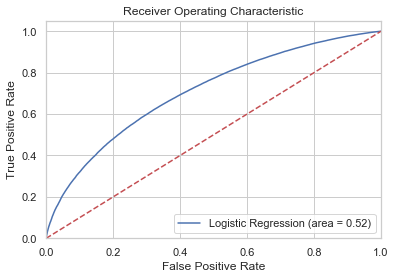

In [154]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, grid_logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, grid_logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### 10.3 Confusion Matrix

The ROC curve shows a good postivity rate and AOC in relation to the diagonal, which represent the curve of a purely random classifier.

In [155]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[  3361  75462]
 [  2777 309482]]


Text(0.5, 257.44, 'Predicted label')

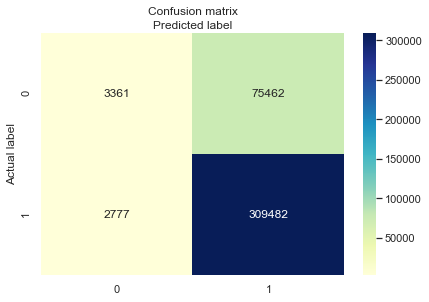

In [156]:
class_names=[1,2]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The Confusion Matrix results show that we have 80.0% correct predictions and 20.0% incorrect predictions.
Correct predictions are the sum of true positives and true negatives. Incorrect predictions are the sum of false positives and false negatives.

In [157]:
from sklearn import metrics
data = {'Confusion Matrix Evaluation Metrics':  ['Accuracy', 'Precision', 'Recall'],
        'Score': [metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred)]}

eval_metrics = pd.DataFrame (data, columns = ['Confusion Matrix Evaluation Metrics','Score'])

eval_metrics

Confusion Matrix Evaluation Metrics  Score
0                            Accuracy  0.800
1                           Precision  0.804
2                              Recall  0.991

Logistic regression has a classification rate of 80% (considered as good accuracy), makes accurate prediction 80.4% of the time and is able to identify if the loan will charge off 99.1% of the time.

### 11. Model Deployment<a id = "dep"></a>

The logistic regression model we have trained can be saved for future use. Below, we save the model as "logreg.model", and execute it back on the test set to demonstrate a successful save process.

In [158]:
from sklearn.externals import joblib
model_file = "logreg.model"
joblib.dump(grid_logreg, model_file)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.



['logreg.model']

In [159]:
selected_model = joblib.load("logreg.model")

In [160]:
score = selected_model.score(X_test, y_test)
print("Accuracy of logistic regression classifier on test set: {:.2f}".format(score))

Accuracy of logistic regression classifier on test set: 0.71


## 12. Conclusion<a id = "con"></a>

We completed our data analytics project in hopes that we can devise a more accurate and faster method for LendingClub to evaluate the credit worthiness of an individual and determine his propensity to default on a loan.

Ideally, the model we create will be able to reduce the application to disbursement time for LendingClub to minutes as well as minimize losses LendingClub is experiencing due to defaulting loans and determine the most significant contributors to the propensity of default of an individual.

Through our in-depth data analysis, we have found that the logistic regression model is the most effective method out of the three models analyzed (Logistic Regression, K-Nearest Neighbours and Random Forest). Logistic Regression has the highest AUROC score of 0.7055, leading us to the selecting this model as the predictive tool to determine an individual’s propensity to default.

Running the Logistic Regression model with LendingClub’s 2010 to 2018 loan data with a 70% training, 30% Testing data partition allows us to evaluate the accuracy of the model. The Logistic Regression model has a very high Recall rate wherein the model was able to accurately predict whether the loan will be charged-off 99.1% of the time.

The model currently predicts with a precision of 80.4%, the inaccuracies largely attributed to flagging non-defaulting individuals as having propensity of defaulting. However, given that the loans business has extremely high cost to business for defaulting, especially so for unsecured loans, it is justifiable to take a more conservative approach in classifying an individual’s propensity to default in order to reduce losses due to defaulting loans.

In conclusion, we find that the model’s output of 99.1% Recall rate and 80.4% Precision rate to be more than suitable for LendingClub’s usage and have been proven to fare much better than the current performance of LendingClub’s loan assessment processes.